In [42]:
# Import necessary packages here, e.g.
import numpy as np                      # for numerical operations
import pandas as pd                     # for data manipulation
import matplotlib.pyplot as plt         # for plotting
import xarray as xr                     # for xarrays and 2-d plotting
import matplotlib.dates as mdates       #for matplotlib dates manipulation 
from matplotlib.colors import LogNorm   #for log scales on pcolormesh  

# 'little greens' in blue seas: prochlorococcus abundance in oligotrophic oceans 

**Zoe Friedland**  

OCEAN 215 Final Project  
Autumn 2024

## Introduction

<!-- Include your motivation and any background information needed to understand your research question and data analysis. Clearly state your research question and hypothesis. -->

**background and motivation:** Until the 1980s, Prochlorococcus was a kind of dark matter of the seas: they are more abundant than any other phytoplankton, but with an average diameter of ~06um, they were too small to detect with existing methods, and slipped through the pores of every net thought to be tight enough to filter out only water. Since they were first discovered by a new technology called flow cytometry, it turned out that they were everywhere—with an estimated mean annual abundance of 10^27 cells in the worlds oceans [1,2,3]. Because they are so abundant and metabolically efficient, they thrive in nutrient-poor oligotrophic oceans and contribute an estimated 20% of global oxygen [4]. Two such oligotrophic regions are located in the northern Pacific and Atlantic subtropical gyres, which are also sites of extensive oceanographic research and data collection: HOT Station Aloha (just north of O’ahu) and BATS (in the Sargasso Sea), respectively. The locations differ on a key attribute—BATS experiences winter/spring deep mixing events and summer-to-fall stratification whereas HOT has a much milder seasonality. 
The impact of seasonal mixing on phytoplankton community dynamics has important implications for understanding ecotypes’  environmental preferences and tolerances and their ecological relationships with each other, information which could also help reveal the evolutionary pressures on these ecotypes — which appear to evolve rapidly [5].  
This dataset identified five ecotypes, which are subclassified as high-light (HL) or low light (LL) adapted.  eMED4 and eMIT9312 are HL; differing int hat the former can grow at temperatures as low as 11-15*C and as a result dominates at higher latitudes while the latter is cold intolerant and extremely adapted to higher temperatures that eMED4 can’t tolerate, and most abundant globally. eMIT9313 and ss120 are LL; the former has the largest genome of the known ecotypes and is abundant in deeper waters except at high latitudes, where it is virtually absent [5]. ss120, on the other hand, has a genome so small Dufresne et. al 2003 wondered if it “might approximate the minimal gene complement of a photosynthetic organism” [6]. However, the functions of all of its genes are still unknown [2]. The last ecotype in the dataset, eNATL, was originally classified as LL, but there is controversy: “based on its fairly high divinyl Chl b to a ratio (Rocap et al. 2002), the eNATL group is in fact somehow intermediate between  HL and LL ecotypes, which is consistent with its position in phylogenetic trees as the closest LL clade from the HL branch (Kettler et al. 2007) and with a number of genomic characteristics shared with one type or the other” [6]. In this report, it is classified as IL (intermediate light).

**research question and hypothesis:**
	With this dataset, I wanted to investigate the relationships between the abundance of high and low light ecotypes and seasonality — specifically its influence on mixed layer depth. BATS and HOT undergo the same seasons, being at similar latitudes in the Northern hemisphere, but BATS experiences much more dramatic changes to its mixed layer depth as it oscillates between summer stratification and winter mixing. I hypothesized that ecotype bloom timing will differ based on high and low light classifications. HL ecotypes may bloom in the summer where their nutrient poor adaptation combines with the plentiful summer sunlight to make them perfect for the stratified oligotrophic waters and help them outcompete other phytoplankton. Meanwhile, LL adapted ecotypes will bloom later as downwelling during deep mixing exports the recycled nitrogen that they rely on. 
	I was also curious about the impacts of ENSO events on prochlorococcus abundance and whether any observed multi-year variation would correlate; there was a moderate El Niño in 2002-03 and a strong La Niña in 2007-08, with a few weak alternating La Niñas and El Niños between that. 

## Data sources:

<!-- List each data source used in your project. For each dataset, include: 
     - Where you accessed it from 
     - Date you accessed/downloaded it 
     - Data collection process
     - Relevant variables (including unit) 
     - Spatial and temporal coverage and resolution 
     - Description of any obstacles or challenges you faced in obtaining the dataset
     - URL to the dataset if available -->

- **dataset 1:** Five year time-series of Prochlorococcus ecotype abundance at HOT and BATS sites from 2002-2008 (C-MORE project, Prochlorococcus project) 

  - **downloaded from** BCO-DMO (Biological and Chemical Oceanography Data Management Office 
  - **data collection process**: At each depth, 100ml seawater was collected onto dia polycarbonate filters with 0.22um pores, saline rinsed, frozen in liquid nitrogen,  and stored at -80C. once back onshore, DNA was then extracted and PCR primers used to differentiate ecotypes.  
  - **relevant variables included**: 
    - *abundance*: cells/mL
    - *temp*: water temperature at measured depth, deg C 
    - *sal*: practical salinity scale, 1978 
    - *depth*: meters
    - *sigma_0*: potential density, kg/m^3
    
  - **spatial coverage and resolution**: 5nm radius around 31 40’N, 64 10’W, and 5nm radius around 22 45’N, 158 00’ W. resolution = inconsistent, samples taken at only a few location within these radii. 
  - **temporal coverage and resolution**: 11/4/2002—12/6/2007, monthly or bimonthly. 
  - **obstacles to data access**: No obstacles; dataset was easy to downlaod as a single csv. 

  - **url to dataset**: https://www.bco-dmo.org/dataset/3381

# 1. Examining Changes to Mixed Layer Depth at HOT and BATS 

<!-- In this cell, introduction the data set(s) you are working with, specify which aspect of your research question this section addresses, and describe the figure you will produce. -->

*dataset:* https://www.bco-dmo.org/dataset/3381 Five year time-series of Prochlorococcus ecotype abundance at HOT and BATS sites from 2002-2008 (C-MORE project, Prochlorococcus project).

To better understand the seasonal variation at HOT and BATS to assist with making later graphs looking at seasonal variation in ecotype abundance, I plotted the average monthly temperature across depth and throughout the 5-year time series covered by the dataset. 

## 1.1 read data

In [2]:
# read data

import pandas as pd
import xarray as xr
import numpy as np
import cmocean
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.colors import LogNorm

oyster = 'https://datadocs.bco-dmo.org/file/oAAmB5KIvvRJwK/hot_bats_2014.csv'
pearl = pd.read_csv(oyster)

# as part of commenting your code throughout this section, discuss any problems you encountered and how you solved them

## 1.2 data cleaning

In [3]:
# perform data cleaning steps

#convert to pandas dataframe 
pearl = pd.DataFrame(pearl)

#convert date column to pandas datetime object, using errors='coerce' to parse items with invalid or absent dates as NaT 
pearl['date'] = pd.to_datetime(pearl['date'], errors='coerce') #i originally didn't use errors=coerce, but it led to issues later; this allowed me to deal with nan values operationally while still letting them show up in my graph as blank.  

#redefine pearl with only columns i plan to use
pearl = pearl[['ecotype','site','year','month','day','date','abundance','temp','sal','depth', 'lat','lon','cruiseid']] #not strictly necessary but it helped me manage my data later because i often had to drop categories of columns for various tasks   

#check datatypes & convert the appropriate ones to floats
pearl['abundance'] = pd.to_numeric(pearl['abundance'], errors = 'coerce') #convert abundance column to a float 
pearl[['temp','sal','depth']] = pearl[['temp','sal','depth']].apply(pd.to_numeric, errors= 'coerce') #convert some other columns to floats in case its needed  
    #pearl.dtypes #check that it worked then comment this out to save visual space 
    
#created filtered versions of pearl including just data from either hot or bats

pearl_bats = pearl[pearl['site'] == 'BATS']
pearl_hot = pearl[pearl['site'] == 'HOT']

## 1.3 perform data analysis

In [4]:
# create copies of site-specific filtered dfs to work off of for the temperature portion of analysis 

fresh_bats = pearl[pearl['site'] == 'BATS']
fresh_hot = pearl[pearl['site'] == 'HOT']

#transform fresh_bats and fresh_hot dfs into xarrays 

#the following code provides solutions to the many errors i ran into creating and graphing from the xarray 
#the main issue was getting compatible shapes of my x, y, and z  

    #create a list of columns where abundance, salinity, and temperatue data is repetitively sampled called halyard
mainsheet = ['depth','date']  

    #drop ecotype and site from both dfs; this was ncessary to make z (temp) 2-d instead of 4-d; i've already filtered for site and i don't need to worry about ecotype yet 
fresh_bats = fresh_bats.drop(['ecotype', 'site'], axis = 1)
fresh_hot = fresh_hot.drop(['ecotype', 'site'], axis = 1) 

#take the mean across mainsheet and store in freshwater_bats and freshwater_hot vars 
freshwater_bats = fresh_bats.groupby(by=mainsheet).mean(numeric_only=False)
freshwater_hot = fresh_hot.groupby(by=mainsheet).mean(numeric_only=False)

#create xarrays out of the new dfs
freshwater_bats_xr = xr.Dataset.from_dataframe(freshwater_bats)
freshwater_hot_xr = xr.Dataset.from_dataframe(freshwater_hot)

# create vars from xarray to plot on & number with axs index corresponding to the subplot  
#this step is totally uncessary i just find it faster to type + easier to read + i like adding beautiful words to my code + i hate copying and pasting all my long (yet too usefully descriptive not to use) variable names like 'freshwater_bats_xr' 
#transitioning from descriptive var names to beautiful single-word ones also signals to me that this is code involving graphing, which helps my brain as an organization method 

wingbone = freshwater_bats_xr
eclipse = freshwater_hot_xr

# -- WINGBONE 
depth_bats = wingbone['depth']
date_bats = wingbone['date']
temp_bats = wingbone['temp']
               

# -- ECLIPSE
depth_hot = eclipse['depth']
date_hot = eclipse['date']                       
temp_hot = eclipse['temp']

### 1.3.1. plot an intermediate figure 

note: this is a figure i used to better understand my data, not one of my final figures.

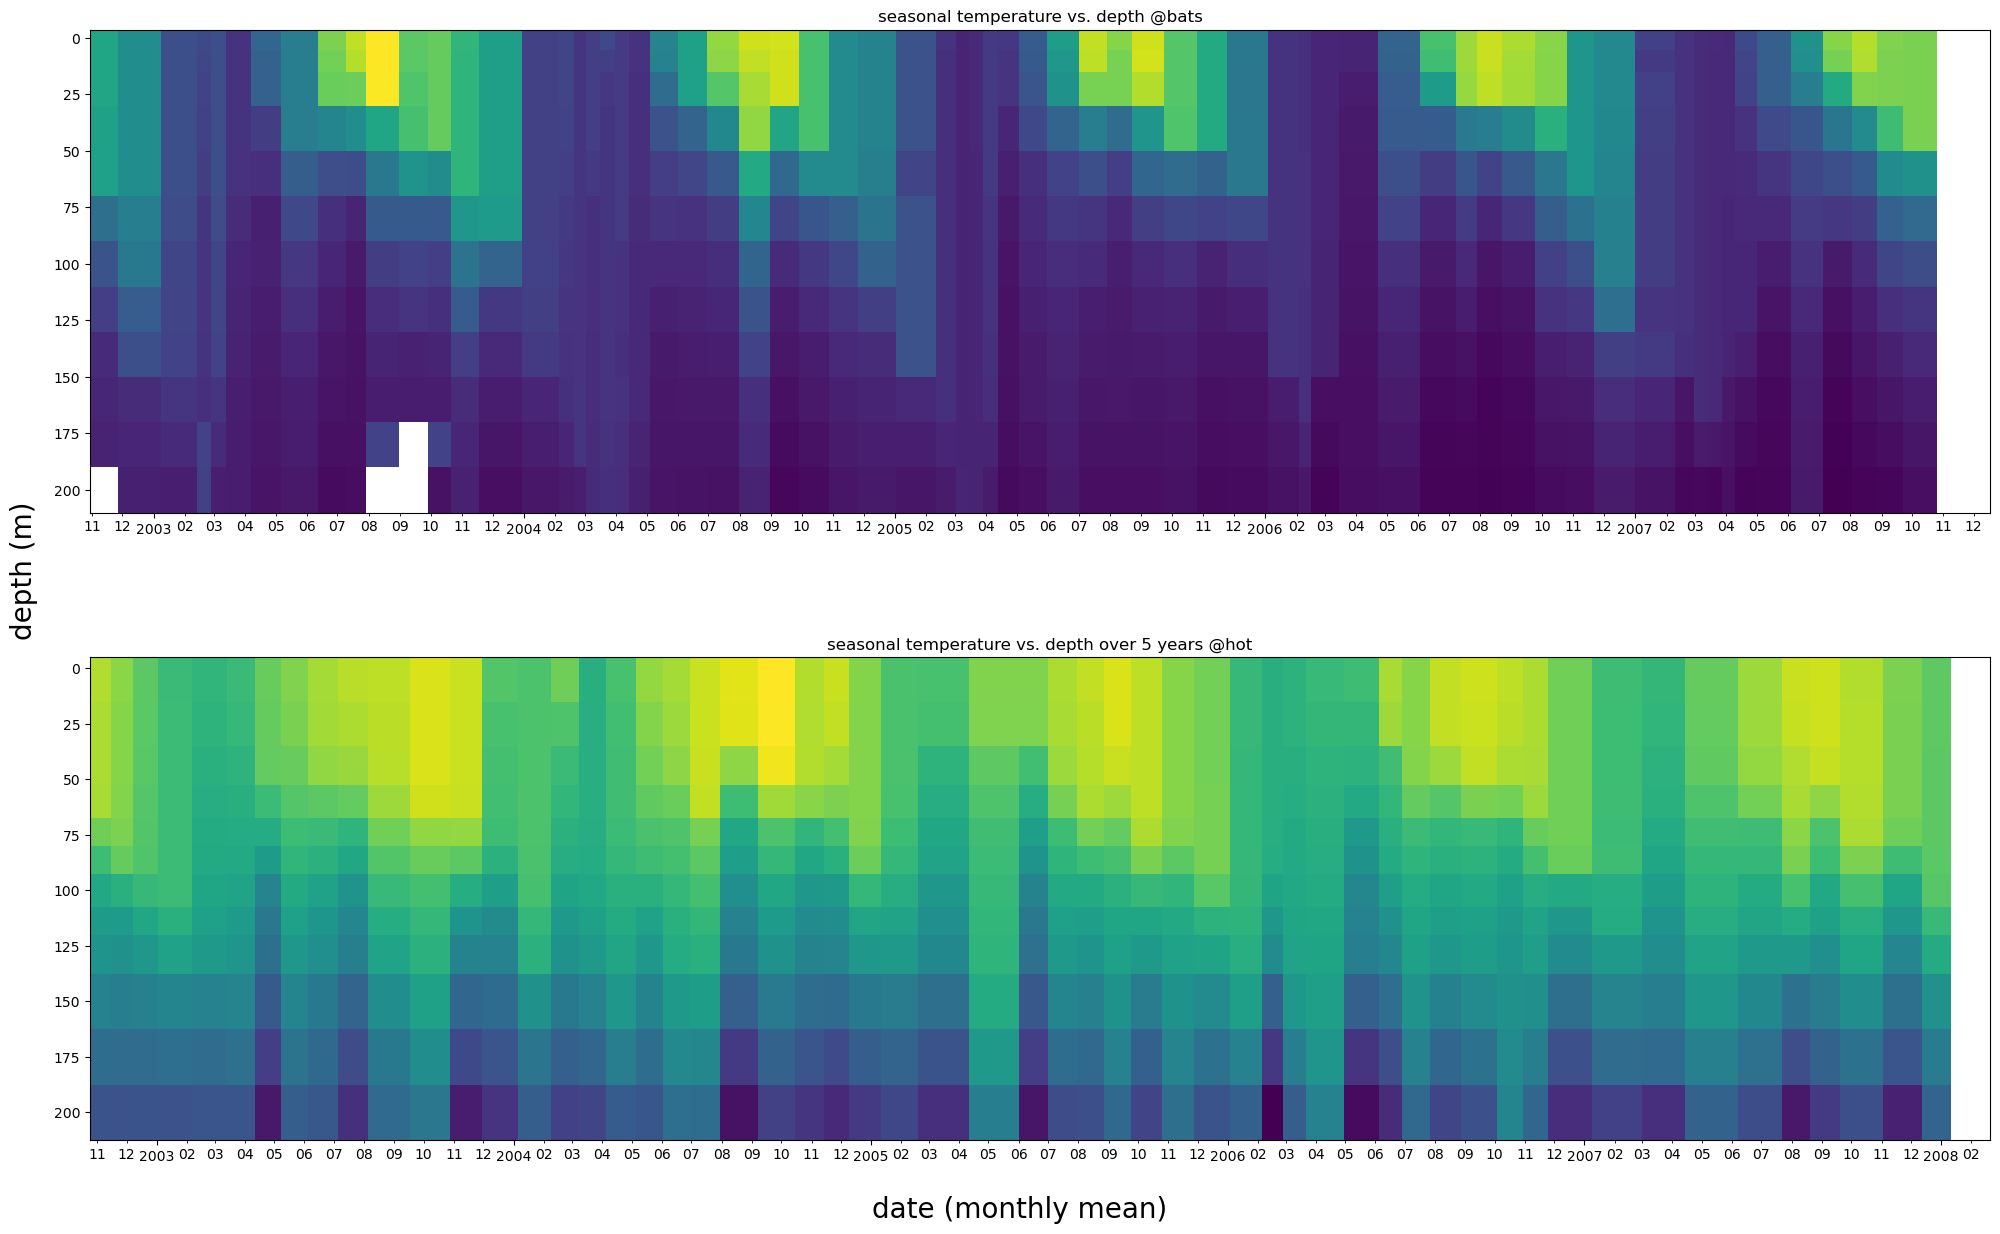

In [5]:
#plot 

fig, axs = plt.subplots(2, figsize=(10,6))

axs[0].set_title('seasonal temperature vs. depth @bats')
axs[0].pcolormesh(date_bats, depth_bats, temp_bats)
axs[0].invert_yaxis()

axs[0].xaxis.set_major_locator(mdates.YearLocator())
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axs[0].xaxis.set_minor_locator(mdates.MonthLocator())
axs[0].xaxis.set_minor_formatter(mdates.DateFormatter('%m'))

axs[1].set_title('seasonal temperature vs. depth over 5 years @hot')
axs[1].pcolormesh(date_hot, depth_hot, temp_hot)
axs[1].invert_yaxis()

axs[1].xaxis.set_major_locator(mdates.YearLocator())
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axs[1].xaxis.set_minor_locator(mdates.MonthLocator())
axs[1].xaxis.set_minor_formatter(mdates.DateFormatter('%m'))         
    
#use .supxlabel and .supylabel to add axis labels for all subplots at once
fig.supxlabel('date (monthly mean)', x=1.03, size='20')
fig.supylabel('depth (m)', y=1.1, size='20')

plt.subplots_adjust(left=0.1, bottom=0.15, right=2.0, top=2.0, wspace=0.2, hspace=0.3)

<!-- Describe how this figure helps address your research question. What patterns or insights can you observe? -->
**Figure 1 Caption:** These plots show the distinct differences in seasonal variation of the mixed depth layer (MLD) at HOT vs BATS. Mixing events occur at the same times at both sites (they are both at approximately the same latitude), but are much more extreme at BATS than at HOT. At both sites, stratification occurs quickly at the spring/summer transition, the MLD reaches a minimum around August/September, and then stratification weakens, slower than it formed, into late fall and winter. Interestingly, at HOT, you can observe multiple 'dark spikes' in the graph, occuring periodically, a few times a year, not exclusive to the winter and early spring months. However, these spikes do not reach the surface and generally are no longer visible on the plot by ~75m deep. I am not sure how to explain these spikes. It may be due to a variable present at HOT but absent at BATS, and/or it may be the result of a phenomenon that is also occuring at BATS, but only visible at HOT due to weaker overall stratification of the water column being more conducive to vertical mixing.   

Based on these plots, for the purpose of defining stratified and deep-mixing periods at the two sites in order to assist with making other plots from this data, I defined two seasonal periods at both sites. **stratified period:** July to October. **mixing period:** January through April.

# 2. Examining Ecotype Depth Preferences with Abundance/Depth Profiles 

<!-- In this cell, introduction the data set(s) you are working with, specify which aspect of your research question this section addresses, and describe the figure you will produce. -->

To understand the relationship between the abundance of different ecotypes throughout the first 200m of the water column sampled in this dataset, I will plot the mean annual abundance of each ecotype as it varies across depth. Then I will make plots of the mean abunance in the summer-stratified and winter-mixed periods; I defined the stratified period as the months of July through October and the winter-mixed period as January through April.

## 2.1 Perform Data Analysis & Display Intermediate Figure #2

First, I looked more closely at the CSV file, which I had also opened as a spreadsheet. It looks like there is a set of depth/abundance data for each ecotype, typically collected once a month, but sometimes twice a month. So I need to take the average abundance of each ecotype at each depth, as 90% of them are only once per month so it seems best to take averages where samples were taken more than once a month and keep my time data at a consistent monthly resolution.

In [7]:
#use groupby to find the average ecotype abundance at each depth for each ecotype 
pearl_grouper = pearl.groupby(['ecotype','site','depth'])['abundance'].mean(numeric_only=False)

#create filtered dfs for each ecotype, at each site
    #pearl_bats and pearl_hot
pearl_bats = pearl[pearl['site'] == 'BATS']
pearl_hot = pearl[pearl['site'] == 'HOT']

        #pearl_bats_ecotype 
pearl_bats_ss120 = pearl_bats[pearl_bats['ecotype'] == 'SS120']
pearl_bats_emed4 = pearl_bats[pearl_bats['ecotype'] == 'eMED4']
pearl_bats_emit9312 = pearl_bats[pearl_bats['ecotype'] == 'eMIT9312']
pearl_bats_emit9313 = pearl_bats[pearl_bats['ecotype'] == 'eMIT9313']
pearl_bats_enatl = pearl_bats[pearl_bats['ecotype'] == 'eNATL']
        #pearl_hot_ecotype 
pearl_hot_ss120 = pearl_hot[pearl_hot['ecotype'] == 'SS120']
pearl_hot_emed4 = pearl_hot[pearl_hot['ecotype'] == 'eMED4']
pearl_hot_emit9312 = pearl_hot[pearl_hot['ecotype'] == 'eMIT9312']
pearl_hot_emit9313 = pearl_hot[pearl_hot['ecotype'] == 'eMIT9313']
pearl_hot_enatl = pearl_hot[pearl_hot['ecotype'] == 'eNATL']


While troubleshooting, I needed to look at a complete (not just a summarized) view of the dataframe, so I could check that I was doing what I thought I was doing. I was having trouble getting pandas to display the full thing, but solved it by changing the default dataframe display settings. However, I had to be careful to only use this on one dataset or it would show them all at once which was impossible to scroll through. So I saved the code, but commented it out after I used it in case I needed it again.

In [8]:
#CODE OPTIONS TO DISPLAY FULL PEARL DF FOR TROUBLESHOTING PURPOSES

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also


    #display the entire dataframe to check that everything looks good 
    #pd.set_option('display.max_rows', None)
    #pd.set_option('display.max_columns', None)
    #display(pearl_grouper)
    
    #reset options back to 10  
    #pd.set_option('display.max_rows', 10)
    #pd.set_option('display.max_columns', 10)


'''
print("PEARL BATS ECOTYPE DATAFRAMES")
display(pearl_bats_ss120)
display(pearl_bats_emed4)
display(pearl_bats_emit9312)
display(pearl_bats_emit9313)
display(pearl_bats_enatl)

print("PEARL HOT ECOTYPE DATAFRAMES")

display(pearl_hot_ss120)
display(pearl_hot_emed4)
display(pearl_hot_emit9312)
display(pearl_hot_emit9313)
display(pearl_hot_enatl)
'''

'\nprint("PEARL BATS ECOTYPE DATAFRAMES")\ndisplay(pearl_bats_ss120)\ndisplay(pearl_bats_emed4)\ndisplay(pearl_bats_emit9312)\ndisplay(pearl_bats_emit9313)\ndisplay(pearl_bats_enatl)\n\nprint("PEARL HOT ECOTYPE DATAFRAMES")\n\ndisplay(pearl_hot_ss120)\ndisplay(pearl_hot_emed4)\ndisplay(pearl_hot_emit9312)\ndisplay(pearl_hot_emit9313)\ndisplay(pearl_hot_enatl)\n'

In [9]:
#use groupby to get the mean abundance at each depth for each ecotype  

    #g_pearl_bats_ecotype 
g_pearl_bats_ss120 = pearl_bats_ss120.groupby(['depth'])['abundance'].mean(numeric_only=False)
g_pearl_bats_emed4 = pearl_bats_emed4.groupby(['depth'])['abundance'].mean(numeric_only=False)
g_pearl_bats_emit9312 = pearl_bats_emit9312.groupby(['depth'])['abundance'].mean(numeric_only=False)
g_pearl_bats_emit9313 = pearl_bats_emit9313.groupby(['depth'])['abundance'].mean(numeric_only=False)
g_pearl_bats_enatl = pearl_bats_enatl.groupby(['depth'])['abundance'].mean(numeric_only=False)

    #g_pearl_hot_ecotype
g_pearl_hot_ss120 = pearl_hot_ss120.groupby(['depth'])['abundance'].mean(numeric_only=False)
g_pearl_hot_emed4 = pearl_hot_emed4.groupby(['depth'])['abundance'].mean(numeric_only=False)
g_pearl_hot_emit9312 = pearl_hot_emit9312.groupby(['depth'])['abundance'].mean(numeric_only=False)
g_pearl_hot_emit9313 = pearl_hot_emit9313.groupby(['depth'])['abundance'].mean(numeric_only=False)
g_pearl_hot_enatl = pearl_hot_enatl.groupby(['depth'])['abundance'].mean(numeric_only=False)

### 2.1.2 Plot Intermediate Figure #2

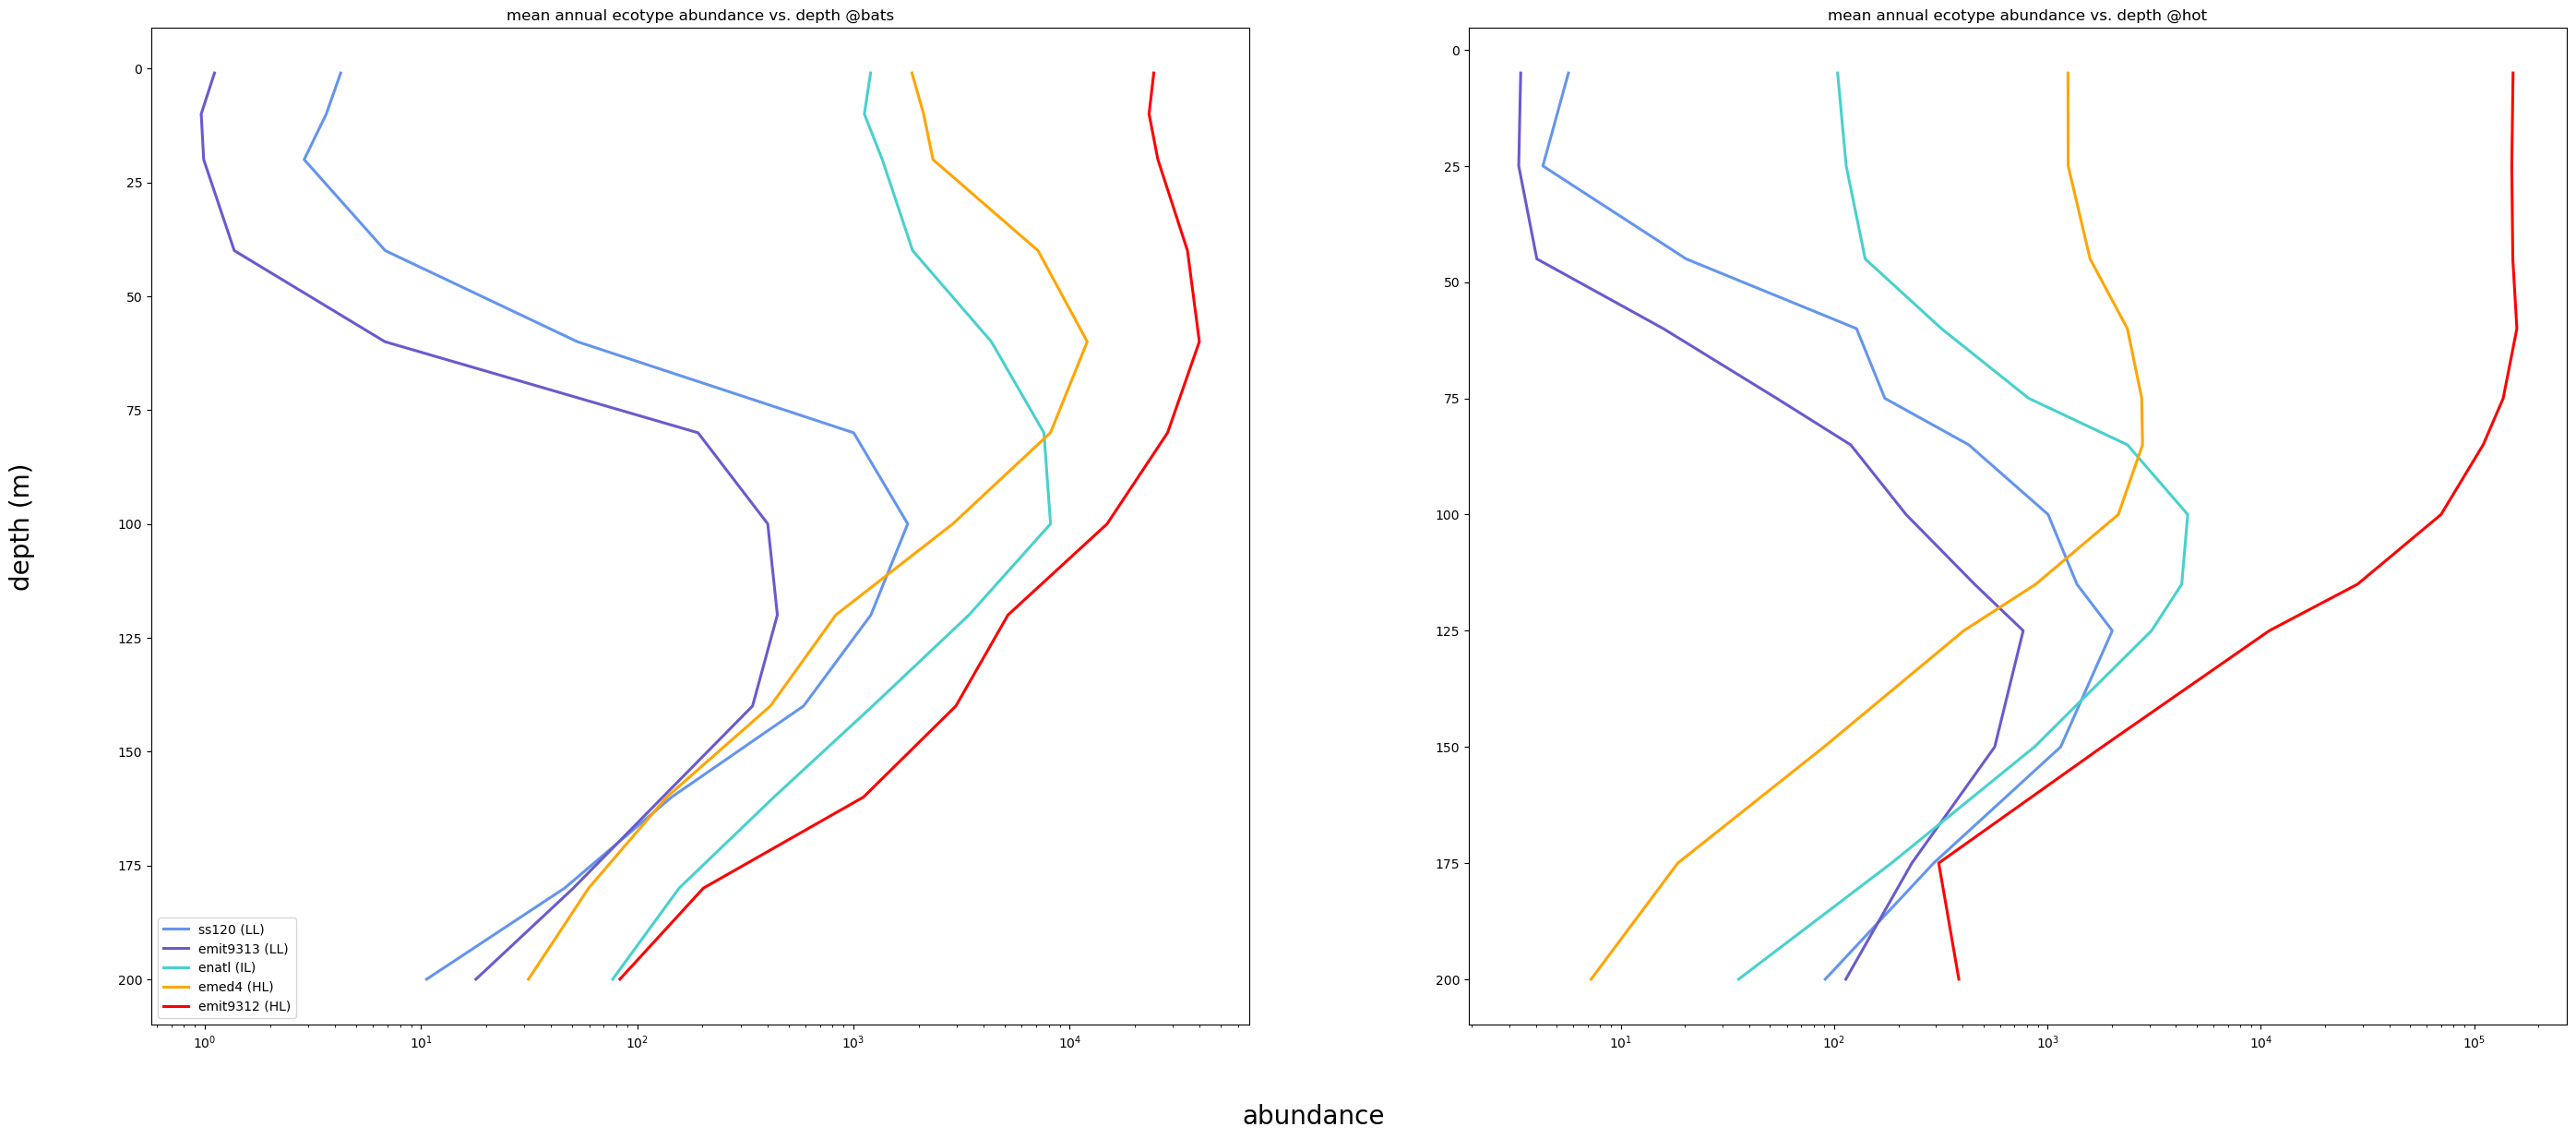

In [21]:
#plot mean annual ecotype abundance at BATS

#note: depth values of g_pearl_bats_ss120 = g_pearl_bats_ss120.index

fig, axs = plt.subplots(nrows=1, ncols=2, figsize = (14,6))
axs[0].invert_yaxis()
axs[0].plot(g_pearl_bats_ss120, g_pearl_bats_ss120.index, label = 'ss120 (LL)', color='cornflowerblue', linewidth=2.2)
axs[0].plot(g_pearl_bats_emit9313, g_pearl_bats_emit9313.index, label = 'emit9313 (LL)', color='slateblue', linewidth=2.2)
axs[0].plot(g_pearl_bats_enatl, g_pearl_bats_enatl.index, label = 'enatl (IL)', color='mediumturquoise', linewidth=2.2)
axs[0].plot(g_pearl_bats_emed4, g_pearl_bats_emed4.index, label = 'emed4 (HL)', color='orange', linewidth=2.2)
axs[0].plot(g_pearl_bats_emit9312, g_pearl_bats_emit9312.index, label = 'emit9312 (HL)', color='red', linewidth=2.2)
axs[0].set_title('mean annual ecotype abundance vs. depth @bats')
axs[0].set_xscale('log')
axs[0].legend()

#plot mean annual ecotype abundance at HOT

axs[1].invert_yaxis()
axs[1].plot(g_pearl_hot_ss120, g_pearl_hot_ss120.index, label = 'ss120 (LL)', color='cornflowerblue', linewidth=2.2)
axs[1].plot(g_pearl_hot_emit9313, g_pearl_hot_emit9313.index, label = 'emit9313 (LL)', color='slateblue', linewidth=2.2)
axs[1].plot(g_pearl_hot_enatl, g_pearl_hot_enatl.index, label = 'enatl (IL)', color='mediumturquoise', linewidth=2.2)
axs[1].plot(g_pearl_hot_emed4, g_pearl_hot_emed4.index, label = 'emed4 (HL)', color='orange', linewidth=2.2)
axs[1].plot(g_pearl_hot_emit9312, g_pearl_hot_emit9312.index, label = 'emit9312 (HL)', color='red', linewidth=2.2)
axs[1].set_title('mean annual ecotype abundance vs. depth @hot')
axs[1].set_xscale('log')

fig.supxlabel('abundance', x=1.03, size='20')
fig.supylabel('depth (m)', y=1.1, size='20')

plt.subplots_adjust(left=0.13, bottom=0.2, right=2.0, top=2.0, wspace=0.2, hspace=0.2)
plt.show()

<!-- Describe how this figure helps address your research question. What patterns or insights can you observe? -->
**intermediate figure 2 caption:** This figure shows the overall (mean annual) abundance of each ecotype across depth. However, its not a super useful picture beyond that because the depth at which each ecotype has its maximum abundance shifts a lot. I created it, however, to reference back to in order to confirm an observation on a later figure. 

## 2.2 Perform Further Data Analysis

In [18]:
#create a variable for the summer to store a list of the months to filter dataframe by  
oligotrophic_months = [7, 8, 9, 10]

#create oli, a filtered df of the pearl df (reprsenting the full dataset/a complete or annual timespan) using pandas dt.month accessor and .isin method 
oli = pearl[pearl['date'].dt.month.isin(oligotrophic_months)]

#filter pre-existing filtered dfs for oligotrophic months as well
#replace pearl with oli in var names to conjugate them for a timespan of the june through november months 

    #oli_bats and oli_hot 
oli_bats = pearl_bats[pearl_bats['date'].dt.month.isin(oligotrophic_months)] #i initally tried to filter for the months using .loc and multiple booleans but couldn't get it to work; i looked for alternative methods in the documentation and used this method instead 
oli_hot = pearl_hot[pearl_hot['date'].dt.month.isin(oligotrophic_months)]

    #create a filtered oli_df for bat and hots for each ecotype  
        #oli_bats_ecotype 
oli_bats_ss120 = oli_bats[oli_bats['ecotype'] == 'SS120']
oli_bats_emed4 = oli_bats[oli_bats['ecotype'] == 'eMED4']
oli_bats_emit9312 = oli_bats[oli_bats['ecotype'] == 'eMIT9312']
oli_bats_emit9313 = oli_bats[oli_bats['ecotype'] == 'eMIT9313']
oli_bats_enatl = oli_bats[oli_bats['ecotype'] == 'eNATL']
        #oli_hot_ecotype 
oli_hot_ss120 = oli_hot[oli_hot['ecotype'] == 'SS120']
oli_hot_emed4 = oli_hot[oli_hot['ecotype'] == 'eMED4']
oli_hot_emit9312 = oli_hot[oli_hot['ecotype'] == 'eMIT9312']
oli_hot_emit9313 = oli_hot[oli_hot['ecotype'] == 'eMIT9313']
oli_hot_enatl = oli_hot[oli_hot['ecotype'] == 'eNATL']

    #group by depth and abundance for hot and bats during oligotrophic months for each ecotype
        #g_oli_bats_ecotype 
g_oli_bats_ss120 = oli_bats_ss120.groupby(['depth'])['abundance'].mean(numeric_only=False)
g_oli_bats_emed4 = oli_bats_emed4.groupby(['depth'])['abundance'].mean(numeric_only=False)
g_oli_bats_emit9312 = oli_bats_emit9312.groupby(['depth'])['abundance'].mean(numeric_only=False)
g_oli_bats_emit9313 = oli_bats_emit9313.groupby(['depth'])['abundance'].mean(numeric_only=False)
g_oli_bats_enatl = oli_bats_enatl.groupby(['depth'])['abundance'].mean(numeric_only=False)
        #g_oli_hot_ecotype 
g_oli_hot_ss120 = oli_hot_ss120.groupby(['depth'])['abundance'].mean(numeric_only=False)
g_oli_hot_emed4 = oli_hot_emed4.groupby(['depth'])['abundance'].mean(numeric_only=False)
g_oli_hot_emit9312 = oli_hot_emit9312.groupby(['depth'])['abundance'].mean(numeric_only=False)
g_oli_hot_emit9313 = oli_hot_emit9313.groupby(['depth'])['abundance'].mean(numeric_only=False)
g_oli_hot_enatl = oli_hot_enatl.groupby(['depth'])['abundance'].mean(numeric_only=False)


#repeat for winter
permafrost_months = [1, 2, 3, 4]

frost = pearl[pearl['date'].dt.month.isin(permafrost_months)]

frost_bats = pearl_bats[pearl_bats['date'].dt.month.isin(permafrost_months)]
frost_hot = pearl_hot[pearl_hot['date'].dt.month.isin(permafrost_months)]

frost_bats_ss120 = frost_bats[frost_bats['ecotype'] == 'SS120']
frost_bats_emed4 = frost_bats[frost_bats['ecotype'] == 'eMED4']
frost_bats_emit9312 = frost_bats[frost_bats['ecotype'] == 'eMIT9312']
frost_bats_emit9313 = frost_bats[frost_bats['ecotype'] == 'eMIT9313']
frost_bats_enatl = frost_bats[frost_bats['ecotype'] == 'eNATL']

frost_hot_ss120 = frost_hot[frost_hot['ecotype'] == 'SS120']
frost_hot_emed4 = frost_hot[frost_hot['ecotype'] == 'eMED4']
frost_hot_emit9312 = frost_hot[frost_hot['ecotype'] == 'eMIT9312']
frost_hot_emit9313 = frost_hot[frost_hot['ecotype'] == 'eMIT9313']
frost_hot_enatl = frost_hot[frost_hot['ecotype'] == 'eNATL']

g_frost_bats_ss120 = frost_bats_ss120.groupby(['depth'])['abundance'].mean(numeric_only=False)
g_frost_bats_emed4 = frost_bats_emed4.groupby(['depth'])['abundance'].mean(numeric_only=False)
g_frost_bats_emit9312 = frost_bats_emit9312.groupby(['depth'])['abundance'].mean(numeric_only=False)
g_frost_bats_emit9313 = frost_bats_emit9313.groupby(['depth'])['abundance'].mean(numeric_only=False)
g_frost_bats_enatl = frost_bats_enatl.groupby(['depth'])['abundance'].mean(numeric_only=False)

g_frost_hot_ss120 = frost_hot_ss120.groupby(['depth'])['abundance'].mean(numeric_only=False)
g_frost_hot_emed4 = frost_hot_emed4.groupby(['depth'])['abundance'].mean(numeric_only=False)
g_frost_hot_emit9312 = frost_hot_emit9312.groupby(['depth'])['abundance'].mean(numeric_only=False)
g_frost_hot_emit9313 = frost_hot_emit9313.groupby(['depth'])['abundance'].mean(numeric_only=False)
g_frost_hot_enatl = frost_hot_enatl.groupby(['depth'])['abundance'].mean(numeric_only=False)

## 2.3 Display Final Figure #1

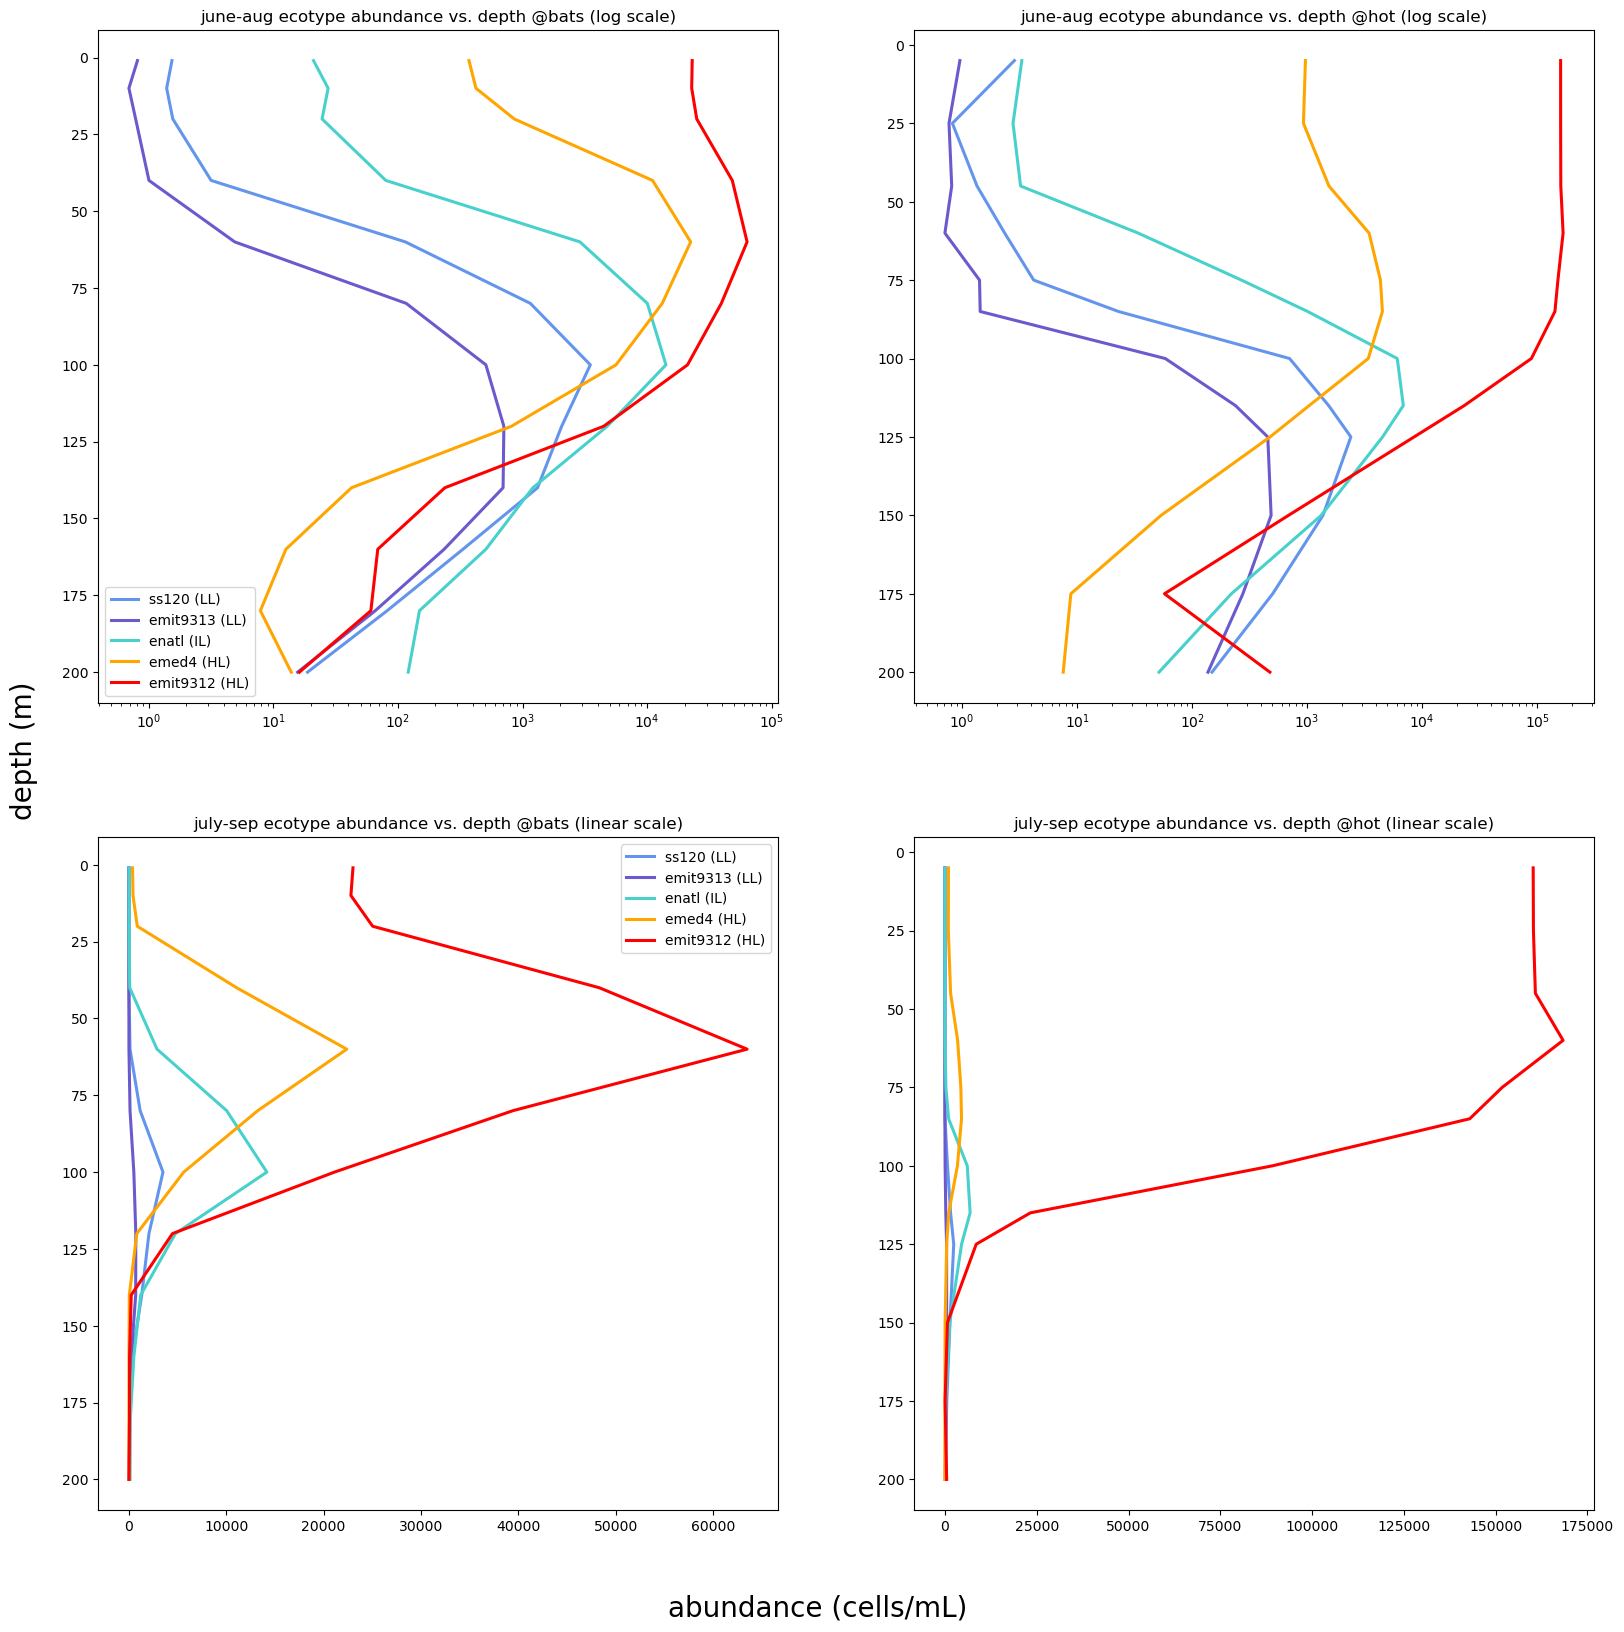

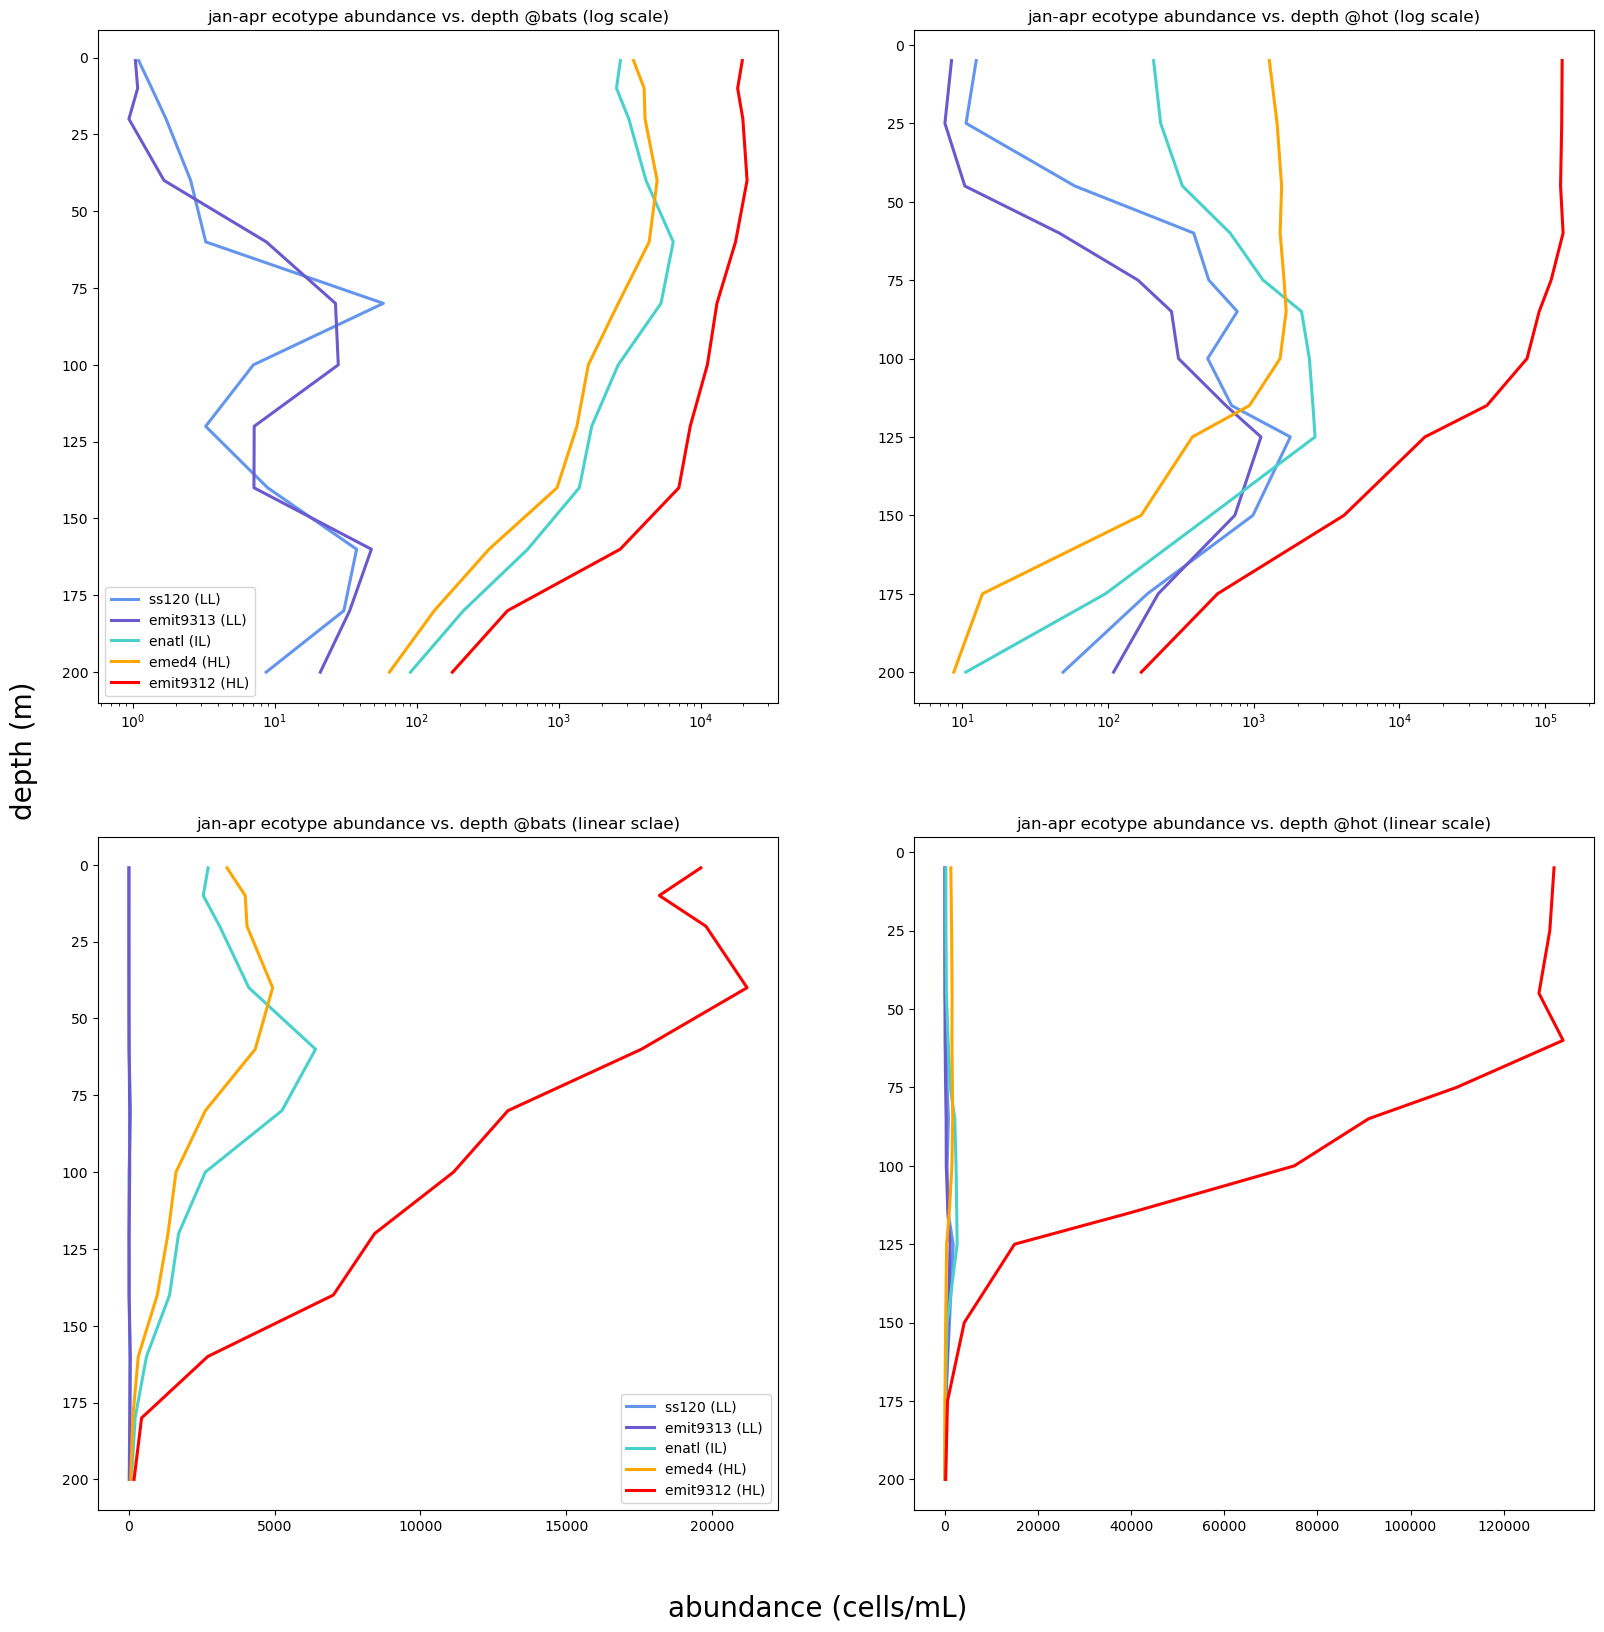

In [22]:
# SUMMER

#bats and hot -- log 
fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (8,8))
axs[0,0].invert_yaxis()
axs[0,0].plot(g_oli_bats_ss120, g_oli_bats_ss120.index, label = 'ss120 (LL)', color='cornflowerblue', linewidth=2.2)
axs[0,0].plot(g_oli_bats_emit9313, g_oli_bats_emit9313.index, label = 'emit9313 (LL)', color='slateblue', linewidth=2.2)
axs[0,0].plot(g_oli_bats_enatl, g_oli_bats_enatl.index, label = 'enatl (IL)', color='mediumturquoise', linewidth=2.2)
axs[0,0].plot(g_oli_bats_emed4, g_oli_bats_emed4.index, label = 'emed4 (HL)', color='orange', linewidth=2.2)
axs[0,0].plot(g_oli_bats_emit9312, g_oli_bats_emit9312.index, label = 'emit9312 (HL)', color='red', linewidth=2.2)
axs[0,0].set_title('june-aug ecotype abundance vs. depth @bats (log scale)')
axs[0,0].legend()
axs[0,0].set_xscale('log')

axs[0,1].invert_yaxis()
axs[0,1].plot(g_oli_hot_ss120, g_oli_hot_ss120.index, label = 'ss120 (LL)', color='cornflowerblue', linewidth=2.2)
axs[0,1].plot(g_oli_hot_emit9313, g_oli_hot_emit9313.index, label = 'emit9313 (LL)', color='slateblue', linewidth=2.2)
axs[0,1].plot(g_oli_hot_enatl, g_oli_hot_enatl.index, label = 'enatl (IL)', color='mediumturquoise', linewidth=2.2)
axs[0,1].plot(g_oli_hot_emed4, g_oli_hot_emed4.index, label = 'emed4 (HL)', color='orange', linewidth=2.2)
axs[0,1].plot(g_oli_hot_emit9312, g_oli_hot_emit9312.index, label = 'emit9312 (HL)', color='red', linewidth=2.2)
axs[0,1].set_title('june-aug ecotype abundance vs. depth @hot (log scale)')
axs[0,1].set_xscale('log')

# bats and hot -- not log 

axs[1,0].invert_yaxis()
axs[1,0].plot(g_oli_bats_ss120, g_oli_bats_ss120.index, label = 'ss120 (LL)', color='cornflowerblue', linewidth=2.2)
axs[1,0].plot(g_oli_bats_emit9313, g_oli_bats_emit9313.index, label = 'emit9313 (LL)', color='slateblue', linewidth=2.2)
axs[1,0].plot(g_oli_bats_enatl, g_oli_bats_enatl.index, label = 'enatl (IL)', color='mediumturquoise', linewidth=2.2)
axs[1,0].plot(g_oli_bats_emed4, g_oli_bats_emed4.index, label = 'emed4 (HL)', color='orange', linewidth=2.2)
axs[1,0].plot(g_oli_bats_emit9312, g_oli_bats_emit9312.index, label = 'emit9312 (HL)', color='red', linewidth=2.2)
axs[1,0].set_title('july-sep ecotype abundance vs. depth @bats (linear scale)')
axs[1,0].legend()

axs[1,1].invert_yaxis()
axs[1,1].plot(g_oli_hot_ss120, g_oli_hot_ss120.index, label = 'ss120 (LL)', color='cornflowerblue', linewidth=2.2)
axs[1,1].plot(g_oli_hot_emit9313, g_oli_hot_emit9313.index, label = 'emit9313 (LL)', color='slateblue', linewidth=2.2)
axs[1,1].plot(g_oli_hot_enatl, g_oli_hot_enatl.index, label = 'enatl (IL)', color='mediumturquoise', linewidth=2.2)
axs[1,1].plot(g_oli_hot_emed4, g_oli_hot_emed4.index, label = 'emed4 (HL)', color='orange', linewidth=2.2)
axs[1,1].plot(g_oli_hot_emit9312, g_oli_hot_emit9312.index, label = 'emit9312 (HL)', color='red', linewidth=2.2)
axs[1,1].set_title('july-sep ecotype abundance vs. depth @hot (linear scale)')

fig.supxlabel('abundance (cells/mL)', x=1.03, size='20')
fig.supylabel('depth (m)', y=1.1, size='20')

plt.subplots_adjust(left=0.13, bottom=0.15, right=2.0, top=2.0, wspace=0.2, hspace=0.2)
plt.savefig('summer bloom abundance graphs.png', bbox_inches='tight')

# WINTER

#bats and hot -- log 
fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (8,8))
axs[0,0].invert_yaxis()
axs[0,0].plot(g_frost_bats_ss120, g_frost_bats_ss120.index, label = 'ss120 (LL)', color='cornflowerblue', linewidth=2.2)
axs[0,0].plot(g_frost_bats_emit9313, g_frost_bats_emit9313.index, label = 'emit9313 (LL)', color='slateblue', linewidth=2.2)
axs[0,0].plot(g_frost_bats_enatl, g_frost_bats_enatl.index, label = 'enatl (IL)', color='mediumturquoise', linewidth=2.2)
axs[0,0].plot(g_frost_bats_emed4, g_frost_bats_emed4.index, label = 'emed4 (HL)', color='orange', linewidth=2.2)
axs[0,0].plot(g_frost_bats_emit9312, g_frost_bats_emit9312.index, label = 'emit9312 (HL)', color='red', linewidth=2.2)
axs[0,0].set_title('jan-apr ecotype abundance vs. depth @bats (log scale)')
axs[0,0].legend()
axs[0,0].set_xscale('log')

axs[0,1].invert_yaxis()
axs[0,1].plot(g_frost_hot_ss120, g_frost_hot_ss120.index, label = 'ss120 (LL)', color='cornflowerblue', linewidth=2.2)
axs[0,1].plot(g_frost_hot_emit9313, g_frost_hot_emit9313.index, label = 'emit9313 (LL)', color='slateblue', linewidth=2.2)
axs[0,1].plot(g_frost_hot_enatl, g_frost_hot_enatl.index, label = 'enatl (IL)', color='mediumturquoise', linewidth=2.2)
axs[0,1].plot(g_frost_hot_emed4, g_frost_hot_emed4.index, label = 'emed4 (HL)', color='orange', linewidth=2.2)
axs[0,1].plot(g_frost_hot_emit9312, g_frost_hot_emit9312.index, label = 'emit9312 (HL)', color='red', linewidth=2.2)
axs[0,1].set_title('jan-apr ecotype abundance vs. depth @hot (log scale)')
axs[0,1].set_xscale('log')

# bats and hot -- not log 

axs[1,0].invert_yaxis()
axs[1,0].plot(g_frost_bats_ss120, g_frost_bats_ss120.index, label = 'ss120 (LL)', color='cornflowerblue', linewidth=2.2)
axs[1,0].plot(g_frost_bats_emit9313, g_frost_bats_emit9313.index, label = 'emit9313 (LL)', color='slateblue', linewidth=2.2)
axs[1,0].plot(g_frost_bats_enatl, g_frost_bats_enatl.index, label = 'enatl (IL)', color='mediumturquoise', linewidth=2.2)
axs[1,0].plot(g_frost_bats_emed4, g_frost_bats_emed4.index, label = 'emed4 (HL)', color='orange', linewidth=2.2)
axs[1,0].plot(g_frost_bats_emit9312, g_frost_bats_emit9312.index, label = 'emit9312 (HL)', color='red', linewidth=2.2)
axs[1,0].set_title('jan-apr ecotype abundance vs. depth @bats (linear sclae)')
axs[1,0].legend()

axs[1,1].invert_yaxis()
axs[1,1].plot(g_frost_hot_ss120, g_frost_hot_ss120.index, label = 'ss120 (LL)', color='cornflowerblue', linewidth=2.2)
axs[1,1].plot(g_frost_hot_emit9313, g_frost_hot_emit9313.index, label = 'emit9313 (LL)', color='slateblue', linewidth=2.2)
axs[1,1].plot(g_frost_hot_enatl, g_frost_hot_enatl.index, label = 'enatl (IL)', color='mediumturquoise', linewidth=2.2)
axs[1,1].plot(g_frost_hot_emed4, g_frost_hot_emed4.index, label = 'emed4 (HL)', color='orange', linewidth=2.2)
axs[1,1].plot(g_frost_hot_emit9312, g_frost_hot_emit9312.index, label = 'emit9312 (HL)', color='red', linewidth=2.2)
axs[1,1].set_title('jan-apr ecotype abundance vs. depth @hot (linear scale)')

fig.supxlabel('abundance (cells/mL)', x=1.03, size='20')
fig.supylabel('depth (m)', y=1.1, size='20')

plt.subplots_adjust(left=0.13, bottom=0.15, right=2.0, top=2.0, wspace=0.2, hspace=0.2)
plt.show()

<!-- Describe how this figure helps address your research question. What patterns or insights can you observe? -->
**Final Figure #1 Caption:**  This figure plots the abundance of each ecotype across depth in the stratified (summer) and mixed (winter) periods, in both a log and linear scale. In the summer, LL and HL ecotypes all peak at unique depths; greater overall ecotype abundance is also correlated with a shallower depth at which a given ecotype's abundance is at its maxiumum. This suggests that one of the trade-offs of being LL-adapted is that its simply harder to live, so populations grow less quickly. In the winter, vertical mixing likely is reponsible for the disruption to this orderly layering of ecotypes; a casual mechanism which is supported by the fact that the disruption to depth-niche layering is much more intense at BATS. Interestingly, the ecotypes appear to 'group up' as HL and LL ecotypes behave very similarly during the winter: the depth distribution of each shifts almost identically from the summer to the the winter, and the horizontal distance (abudnance levels) between depth profiles of similar ecotypes narrows, such that the LL ecotypes group and the IL (intermediate-light) and HL ecotypes group. Specifically, the latter is composed of two subgroups, with eNATL (LL) and emed4 (HL) grouping tightly and eMIT9312 (HL) not following their curve -- it takes on a similar shape but its abundance doens't approach theirs. This is likely due to its extremely high abundance overall. It is suprising however, as I hypothesized that emed4 would increase in abundance during the winter due to its higher cold-tolerance. eNATL, the IL ecotype, also behaves surprisingly like the HLs, despite being originally classified as a LL. 

# 3. Analyzing Seasonal Patterns In Ecotype Abundance/Depth Profiles 

<!-- In the introduction below, specify the data set(s) you are working with in this section, which aspect of your research question this section addresses, and the figure you will produce -->

To understand the relationship between the abundance of different ecotypes and the seasonal shifts of the water column (specifically, seasonal variation in the MLD), I plotted the mean monthly abundance of each ecotype as it varied across both depth and each month of the 5-year timeseries of the dataset, at both HOT and BATS. 

## 3.1 Perform Data Analysis

In [14]:
#create 2-d graphs plotting abundance across depth and time for each ecotype at both sites

#already created variables of dfs filtered for each ecotype at both sites 
#variable naming scheme key: 
#pearl_SITE_ECOTYPE = filtered df for site and ecotype 
#g_pearl_SITE_ECOTYPE = grouped version of above for annual mean abundance and depth. do NOT use these ones here! these are just 2 columns. 

#transform these filtered dfs into xarrays and plot each of them  

#create a list of columns where abundance, salinity, and temperatue data is repetitively sampled called halyard
halyard = ['depth','date','ecotype','site']

#take the mean across halyard and store in each pearl_SITE_ECOTYPE var with added grouper_ suffix   
grouper_pearl_bats_ss120 = pearl_bats_ss120.groupby(by=halyard).mean(numeric_only=False)
grouper_pearl_bats_emed4 = pearl_bats_emed4.groupby(by=halyard).mean(numeric_only=False)
grouper_pearl_bats_emit9312 = pearl_bats_emit9312.groupby(by=halyard).mean(numeric_only=False)
grouper_pearl_bats_emit9313 = pearl_bats_emit9313.groupby(by=halyard).mean(numeric_only=False)
grouper_pearl_bats_enatl = pearl_bats_enatl.groupby(by=halyard).mean(numeric_only=False)
grouper_pearl_hot_ss120 = pearl_hot_ss120.groupby(by=halyard).mean(numeric_only=False)
grouper_pearl_hot_emed4 = pearl_hot_emed4.groupby(by=halyard).mean(numeric_only=False)
grouper_pearl_hot_emit9312 = pearl_hot_emit9312.groupby(by=halyard).mean(numeric_only=False)
grouper_pearl_hot_emit9313 = pearl_hot_emit9313.groupby(by=halyard).mean(numeric_only=False)
grouper_pearl_hot_enatl = pearl_hot_enatl.groupby(by=halyard).mean(numeric_only=False)

#drop the ecotype and site columns, as i dont need them in the xarray -- the df is already filtered for one ecotype and site 
grouper_pearl_bats_ss120 = grouper_pearl_bats_ss120.droplevel(['ecotype', 'site'])
grouper_pearl_bats_emed4 = grouper_pearl_bats_emed4.droplevel(['ecotype', 'site'])
grouper_pearl_bats_emit9312 = grouper_pearl_bats_emit9312.droplevel(['ecotype', 'site'])
grouper_pearl_bats_emit9313 = grouper_pearl_bats_emit9313.droplevel(['ecotype', 'site'])
grouper_pearl_bats_enatl = grouper_pearl_bats_enatl.droplevel(['ecotype', 'site'])
grouper_pearl_hot_ss120 = grouper_pearl_hot_ss120.droplevel(['ecotype', 'site'])
grouper_pearl_hot_emed4 = grouper_pearl_hot_emed4.droplevel(['ecotype', 'site'])
grouper_pearl_hot_emit9312 = grouper_pearl_hot_emit9312.droplevel(['ecotype', 'site'])
grouper_pearl_hot_emit9313 = grouper_pearl_hot_emit9313.droplevel(['ecotype', 'site'])
grouper_pearl_hot_enatl = grouper_pearl_hot_enatl.droplevel(['ecotype', 'site'])
 
#create xarrays out of the new grouper dfs
xr_grouper_pearl_bats_ss120 = xr.Dataset.from_dataframe(grouper_pearl_bats_ss120)
xr_grouper_pearl_bats_emed4 = xr.Dataset.from_dataframe(grouper_pearl_bats_emed4)
xr_grouper_pearl_bats_emit9312 = xr.Dataset.from_dataframe(grouper_pearl_bats_emit9312)
xr_grouper_pearl_bats_emit9313 = xr.Dataset.from_dataframe(grouper_pearl_bats_emit9313)
xr_grouper_pearl_bats_enatl = xr.Dataset.from_dataframe(grouper_pearl_bats_enatl)
xr_grouper_pearl_hot_ss120 = xr.Dataset.from_dataframe(grouper_pearl_hot_ss120)
xr_grouper_pearl_hot_emed4 = xr.Dataset.from_dataframe(grouper_pearl_hot_emed4)
xr_grouper_pearl_hot_emit9312 = xr.Dataset.from_dataframe(grouper_pearl_hot_emit9312)
xr_grouper_pearl_hot_emit9313 = xr.Dataset.from_dataframe(grouper_pearl_hot_emit9313)
xr_grouper_pearl_hot_enatl = xr.Dataset.from_dataframe(grouper_pearl_hot_enatl)

#create a key for the impending deluge of variable names 
#-- a descriptive one for readability, then redefined with more beauty  
#format: xr_grouper_pearl_SITE_ECOTYPE.....[incantation]
#meaning of new default order-- ll to hl (ll) ss120, emit9313, 	enatl,	   (hl) emed4, 		emit9312

    #00 bats_ss120......innards
    #01 bats_emit9313......duodenum
    #02 bats_enatl......sphenoid
    #03 bats_emed4......interstitium
    #04 bats_emit9312......carpal
    
    #10 hot_ss120......fawning
    #11 hot_emit9313......ribbonlike
    #12 hot_enatl......northpole
    #13 hot_emed4......centerfold
    #14 hot_emit9312......premolar 
    
#define incantations 
innards = xr_grouper_pearl_bats_ss120 
duodenum = xr_grouper_pearl_bats_emit9313
sphenoid = xr_grouper_pearl_bats_enatl
interstitium = xr_grouper_pearl_bats_emed4
carpal = xr_grouper_pearl_bats_emit9312

fawning = xr_grouper_pearl_hot_ss120
ribbonlike = xr_grouper_pearl_hot_emit9313
northpole = xr_grouper_pearl_hot_enatl
centerfold = xr_grouper_pearl_hot_emed4
premolar = xr_grouper_pearl_hot_emit9312

#create vars from xarray to plot on & number with axs index corresponding to the subplot  
#00 -- INNARDS 
depth00 = innards['depth']
date00 = innards['date']
abundance00 = innards['abundance']

#01 -- DUODENUM
depth01 = duodenum['depth']
date01 = duodenum['date']
abundance01 = duodenum['abundance']

#02 -- SPHENOID
depth02 = sphenoid['depth']
date02 = sphenoid['date']
abundance02 = sphenoid['abundance']

#03 -- INTERSTITIUM
depth03 = interstitium['depth']
date03 = interstitium['date']
abundance03 = interstitium['abundance']

#04 -- CARPAL
depth04 = carpal['depth']
date04 = carpal['date']
abundance04 = carpal['abundance']                       

#10 -- FAWNING
depth10 = fawning['depth']
date10 = fawning['date']                       
abundance10 = fawning['abundance']
                       
#11 -- RIBBONLIKE
depth11 = ribbonlike['depth']
date11 = ribbonlike['date']
abundance11 = ribbonlike['abundance']

#12 -- NORTHPOLE
depth12 = northpole['depth']
date12 = northpole['date']
abundance12 = northpole['abundance']

#13 -- CENTERFOLD
depth13 = centerfold['depth']
date13 = centerfold['date']
abundance13 = centerfold['abundance']
                
#14 -- PREMOLAR
depth14 = premolar['depth']
date14 = premolar['date']
abundance14 = premolar['abundance']

## 3.2 Display Final Figure #2

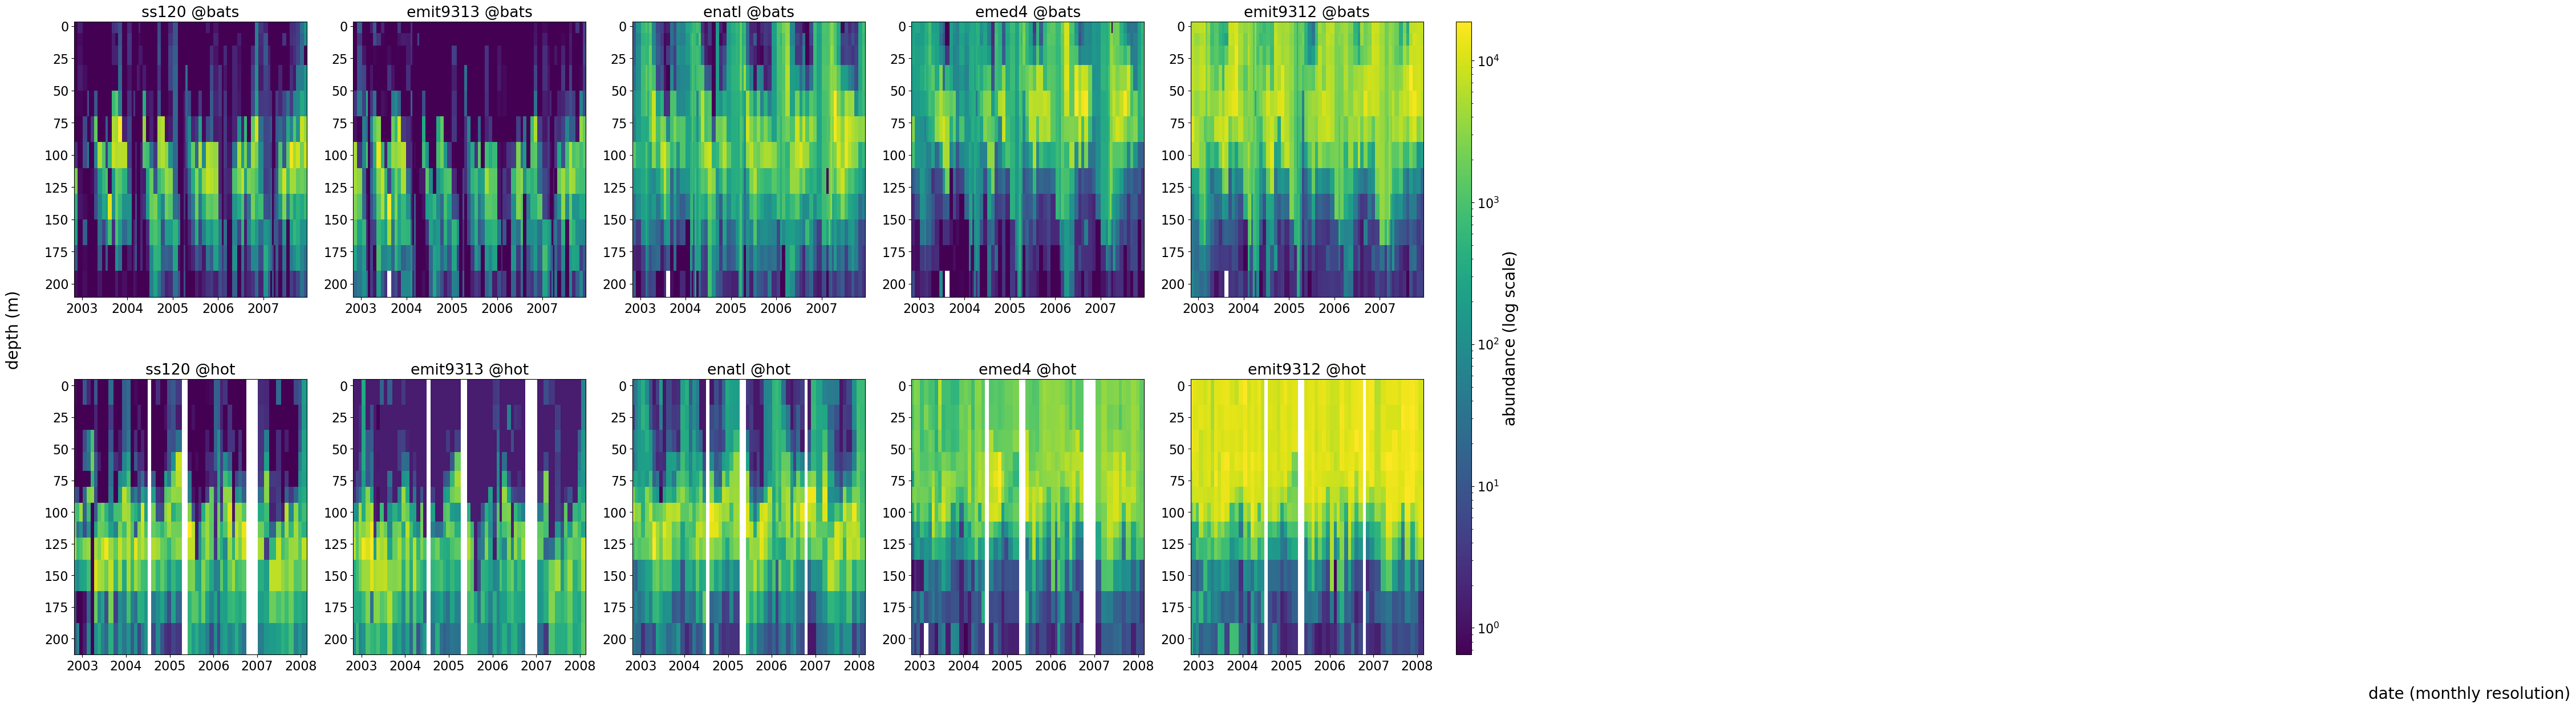

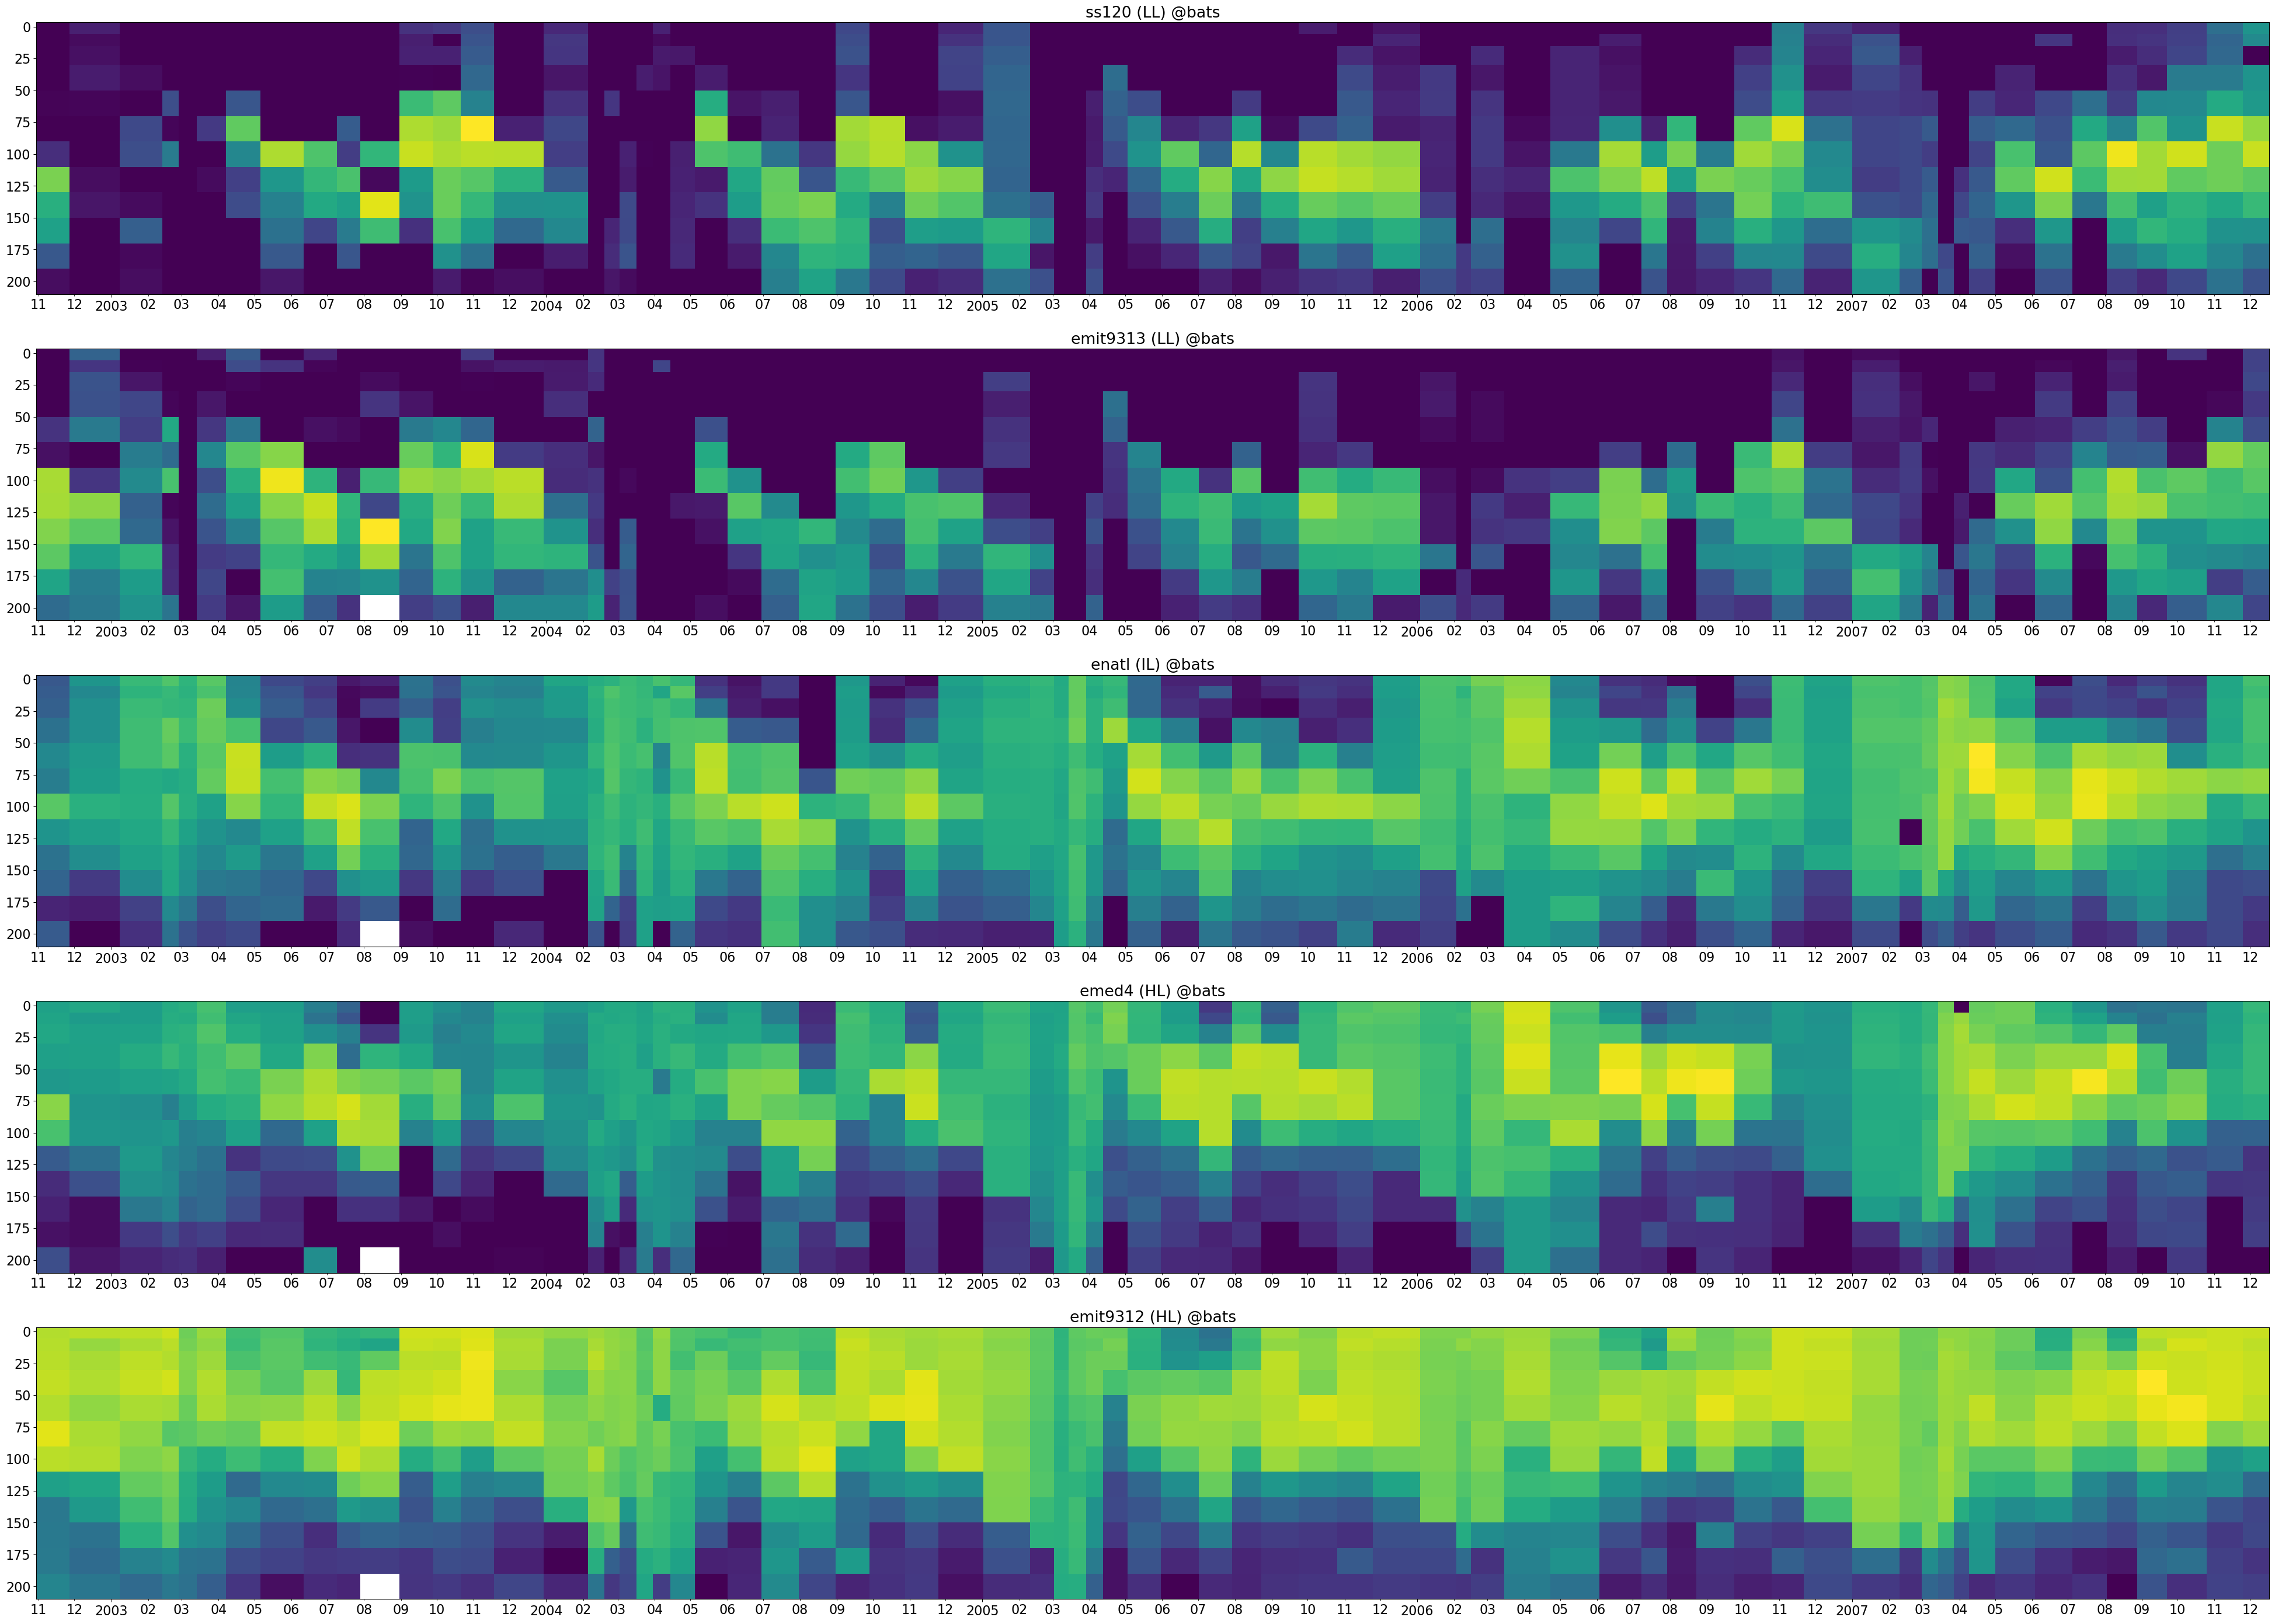

In [37]:
#plot

    #create figure 
fig, axs = plt.subplots(2,5, figsize=(15,6))
#plt.rcParams.update({'font.size': 16})

cmap = 'viridis'
norm = LogNorm() 

plots = []
plots.append(axs[0, 0].pcolormesh(date00, depth00, abundance00, cmap=cmap, norm=norm))
axs[0,0].set_title('ss120 @bats')
axs[0,0].pcolormesh(date00, depth00, abundance00, norm=LogNorm())
axs[0,0].invert_yaxis()

plots.append(axs[0, 1].pcolormesh(date01, depth01, abundance01, cmap=cmap, norm=norm))
axs[0,1].set_title('emit9313 @bats')
axs[0,1].pcolormesh(date01, depth01, abundance01, norm=LogNorm())
axs[0,1].invert_yaxis()

plots.append(axs[0, 2].pcolormesh(date02, depth02, abundance02, cmap=cmap, norm=norm))
axs[0,2].set_title('enatl @bats')
axs[0,2].pcolormesh(date02, depth02, abundance02, norm=LogNorm())
axs[0,2].invert_yaxis()

plots.append(axs[0, 3].pcolormesh(date03, depth03, abundance03, cmap=cmap, norm=norm))
axs[0,3].set_title('emed4 @bats')
axs[0,3].pcolormesh(date03, depth03, abundance03, norm=LogNorm())
axs[0,3].invert_yaxis()

plots.append(axs[0, 4].pcolormesh(date04, depth04, abundance04, cmap=cmap, norm=norm))
axs[0,4].set_title('emit9312 @bats')
axs[0,4].pcolormesh(date04, depth04, abundance04, norm=LogNorm())
axs[0,4].invert_yaxis()

plots.append(axs[1, 0].pcolormesh(date10, depth10, abundance10, cmap=cmap, norm=norm))
axs[1,0].set_title('ss120 @hot')
axs[1,0].pcolormesh(date10, depth10, abundance10, norm=LogNorm())
axs[1,0].invert_yaxis()

plots.append(axs[1, 1].pcolormesh(date11, depth11, abundance11, cmap=cmap, norm=norm))
axs[1,1].set_title('emit9313 @hot')
axs[1,1].pcolormesh(date11, depth11, abundance11, norm=LogNorm())
axs[1,1].invert_yaxis()

plots.append(axs[1, 2].pcolormesh(date12, depth12, abundance12, cmap=cmap, norm=norm))
axs[1,2].set_title('enatl @hot')
axs[1,2].pcolormesh(date12, depth12, abundance12, norm=LogNorm())
axs[1,2].invert_yaxis()

plots.append(axs[1, 3].pcolormesh(date13, depth13, abundance13, cmap=cmap, norm=norm))
axs[1,3].set_title('emed4 @hot')
axs[1,3].pcolormesh(date13, depth13, abundance13, norm=LogNorm())
axs[1,3].invert_yaxis()

plots.append(axs[1, 4].pcolormesh(date14, depth14, abundance14, cmap=cmap, norm=norm))
axs[1,4].set_title('emit9312 @hot')
axs[1,4].pcolormesh(date14, depth14, abundance14, norm=LogNorm())
axs[1,4].invert_yaxis()

#i had a lot of trouble adding and visually formatting labels to a plot with so many subplots
#i ended up the following lines of code to add suplot labels and manually adjust the x and y positions of titles and whitespace margins 
#it took some fiddling with    
fig.supxlabel('date (monthly resolution)', x=2.9, size='20')
fig.supylabel('depth (m)', y=1.1, size='20')
plt.subplots_adjust(left=0.1, bottom=0.15, right=2.0, top=2.0, wspace=0.2, hspace=0.3)

#create colorbar variable and add a label 
cb = fig.colorbar(plots[0], ax=axs, location='right', aspect=40, pad=0.02)
cb.set_label('abundance (log scale)', size=20)

plt.show() #when needing to save my figures, i changed this to:  plt.savefig('figurename.png', bbox_inches='tight')
#doing show plot before save fig 'erases' the plot and it saves a blank figure 
#bbox_inches='tight' was also necessary; otherwise, it would save a weirdly cropped version of the figure 


#create a larger version of the same figure and add monthly ticks to better track seasonal variation 

fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(20,15))
plt.rcParams.update({'font.size': 16})

axs[0].set_title('ss120 (LL) @bats')
axs[0].pcolormesh(date00, depth00, abundance00, norm=LogNorm())
axs[0].invert_yaxis()

axs[0].xaxis.set_major_locator(mdates.YearLocator())
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  
axs[0].xaxis.set_minor_locator(mdates.MonthLocator())
axs[0].xaxis.set_minor_formatter(mdates.DateFormatter('%m'))
             
axs[1].set_title('emit9313 (LL) @bats')
axs[1].pcolormesh(date01, depth01, abundance01, norm=LogNorm())
axs[1].invert_yaxis()

axs[1].xaxis.set_major_locator(mdates.YearLocator())
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axs[1].xaxis.set_minor_locator(mdates.MonthLocator())
axs[1].xaxis.set_minor_formatter(mdates.DateFormatter('%m'))

axs[2].set_title('enatl (IL) @bats')
axs[2].pcolormesh(date02, depth02, abundance02, norm=LogNorm())
axs[2].invert_yaxis()

axs[2].xaxis.set_major_locator(mdates.YearLocator())
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axs[2].xaxis.set_minor_locator(mdates.MonthLocator())
axs[2].xaxis.set_minor_formatter(mdates.DateFormatter('%m'))


axs[3].set_title('emed4 (HL) @bats')
axs[3].pcolormesh(date03, depth03, abundance03, norm=LogNorm())
axs[3].invert_yaxis()

axs[3].xaxis.set_major_locator(mdates.YearLocator())
axs[3].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axs[3].xaxis.set_minor_locator(mdates.MonthLocator())
axs[3].xaxis.set_minor_formatter(mdates.DateFormatter('%m'))

axs[4].set_title('emit9312 (HL) @bats')
axs[4].pcolormesh(date04, depth04, abundance04, norm=LogNorm())
axs[4].invert_yaxis()

axs[4].xaxis.set_major_locator(mdates.YearLocator())
axs[4].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axs[4].xaxis.set_minor_locator(mdates.MonthLocator())
axs[4].xaxis.set_minor_formatter(mdates.DateFormatter('%m'))

'''
#use .supxlabel and .supylabel to add axis labels for all subplots at once
#fig.supxlabel('date (monthly mean)', x=1.03, size='20')
#fig.supylabel('depth (m)', y=1.1, size='20')
'''

#i had trouble with formating the figure size and font sizes to create enough space to clearly read each monthly and yearly tick-mark
#i fiddled a lot with .subplots_adjust to get it to work; ultimately my solution means that the font size is very small 
#relative to the figure and i also could not get .supxlabel and .supylabel to work without messing up the tick fonts again.
#i dont think its impossible however, this second zoomed-in version is only a supplementary figure for analyses purposes
#so i left it as is. in retrospect think a better long-term solution would be to get the month and year ticks to appear rotated 
#but i didn't think of that at the time. 
plt.subplots_adjust(left=0.088, bottom=0.2, right=2.0, top=2.0, wspace=0.2, hspace=0.2) 


<!-- Describe how this figure helps address your research question. What patterns or insights can you observe? -->
**Final Figure #2 Caption:** These figures were created to further understand the seasonal aspect of ecotype-abudnance-depth phenology as well as observe any interannual variation, which could be correlated with ENSO events. While there is mild interannual variation, there is no clear pattern or visible correlation to ENSO events. The second figure is a larger version of the first, with monthly ticks added, so that seasonal patterns can more easily be discerned. In terms of seasonality, the HL and LL ecotypes again display matching seasonal behavior. During winter mixing, the LLs decrease to very low numbers throughout the sampled water column, while HLs become more distributed vertically, with less of a loss to their abundances. Additionally, the timing of the blooms are not simultaneous. The HLs tend to reach peak bloom in midsummer, while the LLs are slightly more delayed toward the end of the fall.  

# 4. Phenology of Ecotype Abundance Over Time 

<!-- In the introduction below, specify the data set(s) you are working with in this section, which aspect of your research question this section addresses, and the figure you will produce -->

To look at how abundance of different ecotypes changed over time, I plotted the mean monthly abundance of each ecotype in the form of an 'average year', then triplicated that year to better visualize how one year moved into the next. 

## 4.1 Perform Data Analysis & Display Intermediate Figure #2 

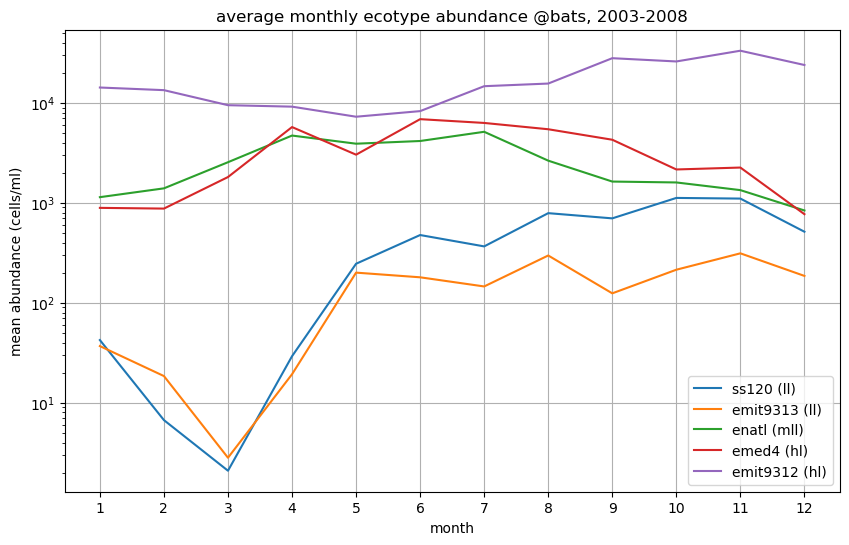

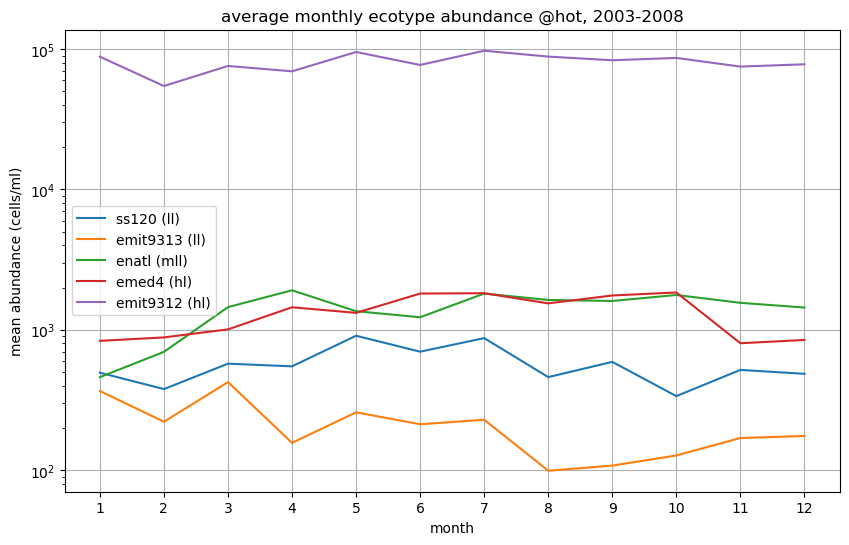

In [16]:
#@ BATS ----------------------------------------

#create list of dfs filtered for bats and each of the ecotypes
bats_eco_dfs_list = [pearl_bats_ss120, pearl_bats_emit9313, pearl_bats_enatl, pearl_bats_emed4, pearl_bats_emit9312]

#create ecotype labels to add to the legend when plotting 
bats_eco_labels = ['ss120 (LL)', 'emit9313 (LL)', 'enatl (IL)', 'emed4 (IL)', 'emit9312 (HL)']

# create var to reindex months so they are plotted in order
month_rows2reindex = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

# create figure
plt.figure(figsize=(10, 6))

#use for loop to plot each ecotype 
for bats_eco_index, bats_eco in enumerate(bats_eco_dfs_list): #= for df_index, df in enumerate(list of dataframes to iterate through )
    
     # use groupby to get the mean monthly abundance over 5 year timeseries  
    mm_bats_eco = bats_eco.groupby(['month', 'year'])['abundance'].mean(numeric_only=False) #mm = monthly mean grouped version of df
    mm_bats_eco = mm_bats_eco.groupby(['month']).mean(numeric_only=False)

    # put months in order 
    mm_bats_eco = mm_bats_eco.reindex(month_rows2reindex)

    # plot 
    plt.plot(mm_bats_eco, label=bats_eco_labels[bats_eco_index])

# Add labels, legend, and title
plt.xlabel('month')
plt.ylabel('mean abundance (cells/ml)')
plt.title('average monthly ecotype abundance @bats, 2003-2008')
plt.legend()
plt.grid(True)
plt.yscale('log')
    

#@ HOT ----------------------------------------

#get average abundance for each month over the 5 years of data 

#create list of dfs filtered for bats and a unique ecotype  
hot_eco_dfs_list = [pearl_hot_ss120, pearl_hot_emit9313, pearl_hot_enatl, pearl_hot_emed4, pearl_hot_emit9312]

#create ecotype labels to add to the legend when plotting 
hot_eco_labels = ["ss120 (LL)", "emit9313 (LL)", "enatl (IL)", "emed4 (HL)", "emit9312 (HL)"]

# create var to reindex months so they are plotted in order
month_rows2reindex = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

# create figure
plt.figure(figsize=(10, 6))

#use for loop to plot each ecotype 
for hot_eco_index, hot_eco in enumerate(hot_eco_dfs_list): #= for df_index, df in enumerate(list of dataframes to iterate through )
    
     # use groupby to get the mean monthly abundance over 5 year timeseries  
    mm_hot_eco = hot_eco.groupby(['month', 'year'])['abundance'].mean(numeric_only=False) #mm = monthly mean grouped version of df
    mm_hot_eco = mm_hot_eco.groupby(['month']).mean(numeric_only=False)

    # put months in order 
    mm_hot_eco = mm_hot_eco.reindex(month_rows2reindex)

    # plot 
    plt.plot(mm_hot_eco, label=hot_eco_labels[hot_eco_index])

# Add labels, legend, and title
plt.xlabel('month')
plt.ylabel('mean abundance (cells/ml)')
plt.title('average monthly ecotype abundance @hot, 2003-2008')
plt.legend()
plt.grid(True)
plt.yscale('log')

<!-- Describe how this figure helps address your research question. What patterns or insights can you observe? -->
**intermediate figure 3 caption:** This intermediate figure takes, for each ecotype, the mean abundance per month, such that each plotted value represents the average abundance that month over the whole 5-year timeseries. This produces a yearly overview of the relationships between ecotypes over time.  

## 4.2 Display Final Figure #3

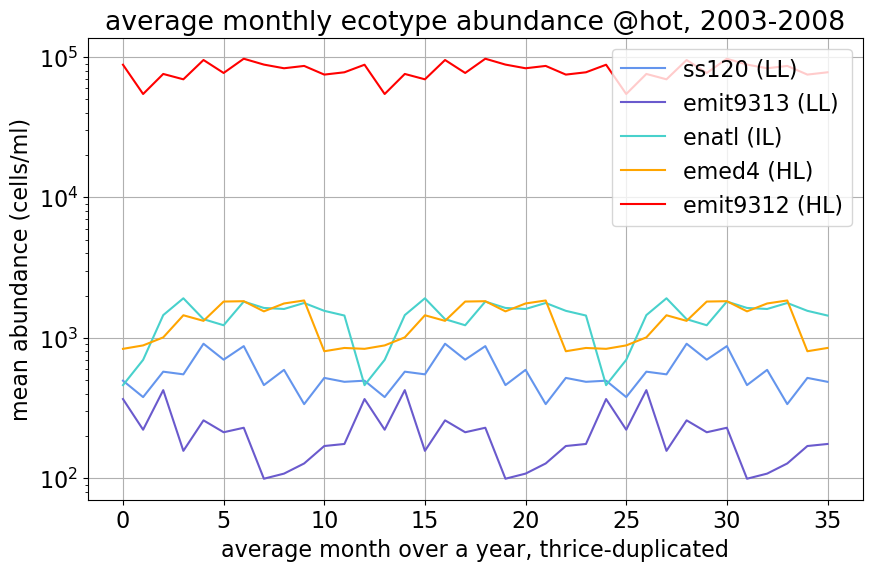

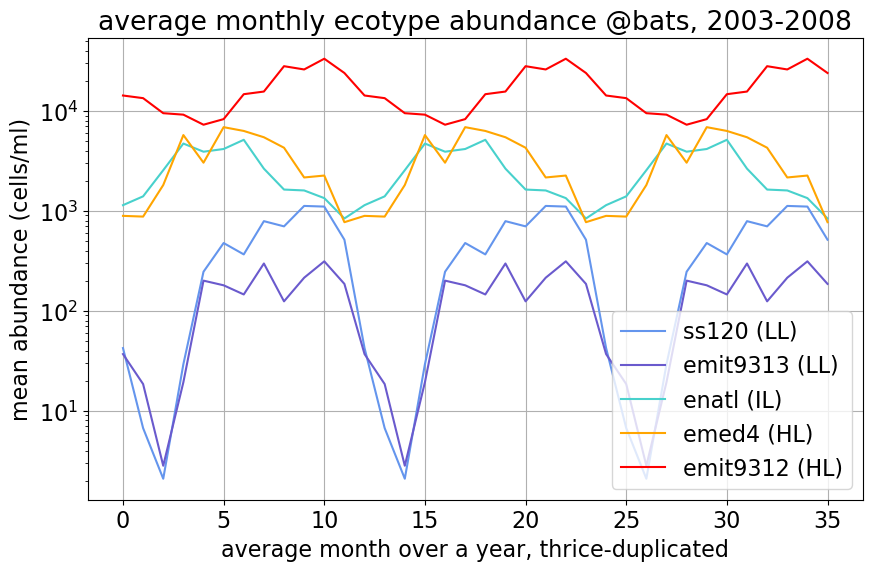

In [38]:
#triplicate the x-axis to better visualize seasonal cycling  

#TRIPLED @BATS ------------

#create list of dfs filtered for bats and a unique ecotype  
bats_eco_dfs_list = [pearl_bats_ss120, pearl_bats_emit9313, pearl_bats_enatl, pearl_bats_emed4, pearl_bats_emit9312]

#create ecotype labels to add to the legend when plotting 
bats_eco_labels = ["ss120 (LL)", "emit9313 (LL)", "enatl (IL)", "emed4 (HL)", "emit9312 (HL)"]

#colors
colors = ['cornflowerblue','slateblue', 'mediumturquoise','orange','red']

# create var to reindex months so they are plotted in order
month_rows2reindex = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

# create figure
plt.figure(figsize=(10, 6))
 
for bats_eco_index, bats_eco in enumerate(hot_eco_dfs_list): #= for df_index, df in enumerate(list of dataframes to iterate through )
    mm_bats_eco = bats_eco.groupby(['month', 'year'])['abundance'].mean(numeric_only=False) #mm = monthly mean grouped version of df
    mm_bats_eco = mm_bats_eco.groupby(['month']).mean(numeric_only=False) 
    mm_bats_eco = mm_bats_eco.reindex(month_rows2reindex)
    
    mm_bats_eco_triso = pd.concat([mm_bats_eco, mm_bats_eco, mm_bats_eco], ignore_index=True)
    
    plt.plot(mm_bats_eco_triso, label=bats_eco_labels[bats_eco_index], color=colors[bats_eco_index])

plt.xlabel('average month over a year, thrice-duplicated')
plt.ylabel('mean abundance (cells/ml)')
plt.title('average monthly ecotype abundance @hot, 2003-2008')
plt.legend()
plt.grid(True)
plt.yscale('log')

plt.show() #plt.savefig('hothot.png', bbox_inches='tight')

#TRIPLED @HOT ------------

#create list of dfs filtered for bats and a unique ecotype  
hot_eco_dfs_list = [pearl_hot_ss120, pearl_hot_emit9313, pearl_hot_enatl, pearl_hot_emed4, pearl_hot_emit9312]

#create ecotype labels to add to the legend when plotting 
hot_eco_labels = ["ss120 (LL)", "emit9313 (LL)", "enatl (IL)", "emed4 (HL)", "emit9312 (HL)"]

#colors
colors = ['cornflowerblue','slateblue', 'mediumturquoise','orange','red']

# create var to reindex months so they are plotted in order
month_rows2reindex = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

# create figure
plt.figure(figsize=(10, 6))
 
for hot_eco_index, hot_eco in enumerate(bats_eco_dfs_list): #= for df_index, df in enumerate(list of dataframes to iterate through )
    mm_hot_eco = hot_eco.groupby(['month', 'year'])['abundance'].mean(numeric_only=False) #mm = monthly mean grouped version of df
    mm_hot_eco = mm_hot_eco.groupby(['month']).mean(numeric_only=False) 
    mm_hot_eco = mm_hot_eco.reindex(month_rows2reindex)
        
    mm_hot_eco_triso = pd.concat([mm_hot_eco, mm_hot_eco, mm_hot_eco], ignore_index=True) #i couldn't get this to work until i added ignore_index, because this was my first time plotting a dataframe 'directly' rather than calling in columns  
    
    plt.plot(mm_hot_eco_triso, label=hot_eco_labels[hot_eco_index], color=colors[hot_eco_index])
        
plt.xlabel('average month over a year, thrice-duplicated')
plt.ylabel('mean abundance (cells/ml)')
plt.title('average monthly ecotype abundance @bats, 2003-2008')
plt.legend()
plt.grid(True)
plt.yscale('log') 

plt.show() #plt.savefig('batsbats.png', bbox_inches='tight')

<!-- Describe how this figure helps address your research question. What patterns or insights can you observe? -->
**Final Figure #3 Caption:**  At BATS, ss120 and emit9313 (the two LLs) group tightly most of the year, with ss120 diverging a little as it grows into a higher bloom than eMIT9313. eNATL and eMED4 (IL and HL) also group together year round. eMIT9313 (HL) shows an inverse pattern to eNATL and eMED4, peaking around when the LLs peak, in the fall, while eNATL and eMED4 peak slightly earlier, in midsummer. The LL ecotypes also experience the most dramatic overall changes in abudnance, while the IL and HLs experience much more mild fluctuations.  

# Discussion
**Interpretation of Results:** 
<!-- Summarize what you learned from each data analysis section/figure. Discuss key insights and conclusions regarding your research question. Do your results support or contradict your hypothesis? -->

These analyses as a whole reveal fascinatingly enigmatic depth- and season-dependent patterns in ecotype abundance. 
In figure 1, each ecotype peaks at a unique depth during summer stratification, with shallower peaks correlated strongly with higher overall abundances, suggesting that LL-adapted ecotypes face trade-offs in growth rates due to the hardship presented by low-light conditions; their adaptions do not appear to be enough to put their population-sizes on an equal caliber with the HL ecotypes. The unexepcted behavior of eNATL, the intermediate-behaving ecotype originally classified as low light, was surprisingly more like the HL ecotype emed4 than either LL ecotype. eMED4 did not increase in abundance in the winter as hypothesized, despite its higher cold-tolerance, indicating that temperature may not be playing a very strong role in ecotype depth profiles directly. 

Figures 2 and 3 further elucidate seasonal and internannual pattterns. LL ecotypes experience signifiacnt declines in abundance during winter mixing, while HL ecotypes show an inverse pattern of becoming broadly distributed throughout the water column with much less pronounced reductions in abundance. Peak bloom timing is also somewhat stagged, with HL ecotypes blooming midsummer and LL ecotypes peaking later in the fall. This somewhat supports my hypothesis that vertical mixing would be more conducive to LL blooms than HL blooms, although the timings are much closer together than expected, with both ultimately still blooming within the oligotrophic stratified period, just at different times within those four months.  

In alignment with the dark banding pattern observed in Figure 2 showing that LL ecotypes nearly dissapear during the winter while HLs spread beyond their summer depth range, Figure 3 shows how they undergo much more intense seasonal abundance fluctuations compared to HL and IL ecotypes. Overall, the inter-ecotype patterns at BATS and HOT are very similar, but intensified at BATS; given that a primary difference between these sites is BATS' more intense seasonality, it supports my hypothesis that vertical water mixing may be a driver of of the observed depth profiles. The grouping-up of HL/IL and LL ecotypes was surprsing; while I hypothesized that they may share bloom timing, I did not expect them to behave more similarly to each other during that mixing as compared to their summer depth distribution. 

Regarding my ENSO-correlation research question, the null hypothesis is supported from these data; despite observing very mild interannual variations, there was no clear pattern, and the observed variation is likely explainable as noise or due to other factors such as mesoscale eddies. 

**Limitations and Future Work:** 
<!-- Identify limitations in your analysis. Discuss any factors that may have impacted the validity or reliability of your results (e.g., data quality, sample size, assumptions). -->
<!-- What next steps could you or another researcher take to continue investigating this research question? Suggest ideas for further research, data collection, or alternative methodologies that could enhance understanding of the topic. -->


The lack of a clear correlation to ENSO events may influenced by an insufficient temporal resolution, potentially obscuring larger-scale trends. There were no strong ENSO events between 2003 and 2008, only moderate and weak ones. Additionally, its unclear how long prochloroccous in samples are surviving in the water after they were sampled, an unknown that could be infuencing the data collected during deep mixing, e.g., HL ecotypes may be being mixed vertically downwards and appearing at high abundances but dying shortly afterwards. In terms of data analysis, statistical analyses would also be useful in elucidating the significance of the observed patterns. And In terms of further research, I think that these data provide an insightful jumping-off point into further understanding the genetic and evolutionary bases of these ecotype relationships, as well as the collection of further data taking a broader look at inter-species phytoplankton community dyanmics to understand how prochlorococcus ecotype depth and season profiles may be interacting or changing relative to other phytoplankton.

# References  

1. **Flombaum, P., Gallegos, J. L., Gordillo, R. A., Rincón, J., Zabala, L. L., Jiao, N., Karl, D. M., Li, W. K., Lomas, M. W., Veneziano, D., Vera, C. S., Vrugt, J. A., & Martiny, A. C.** (2013). *Present and future global distributions of the marine cyanobacteria prochlorococcus and synechococcus.* Proceedings of the National Academy of Sciences, 110(24), 9824–9829. https://doi.org/10.1073/pnas.1307701110 

2. **Chrisholm, W., Sallie. (2011).** *Unveiling Prochlorococcus*. Microbe. https://hahana.soest.hawaii.edu/cmoreserver/summercourse/2012/documents/chisholm_06-01-12/Chisholm-2011_Unveiling_Prochlorococcus-Microbe.pdf. 

3. **National Ocean Sevice, NOAA**. 6 Dec 2024. *How much oxygen comes from the ocena?*. https://oceanservice.noaa.gov/facts/ocean-oxygen.html. 

4. **Partensky, F., Hess, W. R., & Vaulot, D.** (1999). *prochlorococcus, a marine photosynthetic prokaryote of Global Significance.* Microbiology and Molecular Biology Reviews, 63(1), 106–127. https://doi.org/10.1128/mmbr.63.1.106-127.1999 

5. **Partensky, Frédéric, & Garczarek, L.** (2010). *prochlorococcus: Advantages and limits of minimalism.* Annual Review of Marine Science, 2(1), 305–331. https://doi.org/10.1146/annurev-marine-120308-081034 

6. **Dufresne, A., Salanoubat, M., Partensky, F., Artiguenave, F., Axmann, I. M., Barbe, V., Duprat, S., Galperin, M. Y., Koonin, E. V., Le Gall, F., Makarova, K. S., Ostrowski, M., Oztas, S., Robert, C., Rogozin, I. B., Scanlan, D. J., de Marsac, N. T., Weissenbach, J., Wincker, P., … Hess, W. R.** (2003). *Genome sequence of the cyanobacterium     prochlorococcus marinus SS120, a nearly minimal oxyphototrophic genome.* Proceedings of the National Academy of Sciences, 100(17), 10020–10025. https://doi.org/10.1073/pnas.1733211100 